# **Dataset Characterization**

## _ETL Workflow Notebook 2_

## Content:

1. Visualizing and characterizing distribution of missing values;
2. Visualizing missingness across a variable, and comparing it to another variable (both numeric);
3. Dealing with missing values;
4. Visualizing time series;
5. Visualizing custom image files and loading them as NumPy arrays;
6. Visualizing histograms;
7. Plotting bar charts;
8. Testing normality and visualizing the probability plot;
9. Testing and visualizing probability plots for different statistical distributions;
10. Calculating cumulative statistics;
11. Obtaining the correlation plot;
12. Obtaining the covariance matrix;
13. Obtaining Variance Inflation Factors (VIFs);
14. Obtaining scatter plots and simple linear regressions;
15. Performing the polynomial fitting;
16. Filtering (selecting); ordering; or renaming columns from the dataframe;
17. Renaming specific columns from the dataframe; or cleaning columns' labels.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [2]:
import load
from idsw import *

/content/idsw/datafetch/core.py:1713: SyntaxWarning: invalid escape sequence '\p'
  engine = create_engine(r"sqlite:///C:\path\to\foo.db")
/content/idsw/datafetch/pipes.py:317: SyntaxWarning: invalid escape sequence '\s'
  txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
/content/idsw/datafetch/pipes.py:1271: SyntaxWarning: invalid escape sequence '\('
  To find a spec like "TensorSpec(shape=(None, *, *)" the Regex would be: r"TensorSpec\(shape=\(None, (\d+), (\d+)\)"
/content/idsw/modelling/core.py:2751: SyntaxWarning: invalid escape sequence '\{'
  * Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
/content/idsw/modelling/core.py:2846: SyntaxWarning: invalid escape sequence '\{'
  $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$,


Package copied to the working directory.
To import its whole content, run:

    from idsw import *



/content/idsw/modelling/deep.py:239: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/modelling/deep.py:445: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/etl/core.py:2462: SyntaxWarning: invalid escape sequence '\d'
  r'st\d\s\w{3,10}'
/content/idsw/etl/core.py:2583: SyntaxWarning: invalid escape sequence '\d'
  - re.findall(r"\d+-\d+", text) - returns: ['4-3', '10-04']
/content/idsw/etl/core.py:2632: SyntaxWarning: invalid escape sequence '\s'
  - If we do re.findall(r"the\s\d+s", my_string) - returns: ['the 80s', 'the 90s']
/content/idsw/etl/core.py:2720: SyntaxWarning: invalid escape sequence '\d'
  - Example: re.match(r"\d+", "12345bcada") - returns: <_sre.SRE_Match object; span=(0

In [7]:
! pip install ucimlrepo
def download_dataset():

  from ucimlrepo import fetch_ucirepo
  # Forty Soybean Cultivars from Subsequent Harvests
  #https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests

  # fetch dataset
  forty_soybean_cultivars_from_subsequent_harvests = fetch_ucirepo(id=913)

  # data (as pandas dataframes)
  X = forty_soybean_cultivars_from_subsequent_harvests.data.features
  y = forty_soybean_cultivars_from_subsequent_harvests.data.targets

  # metadata
  print(forty_soybean_cultivars_from_subsequent_harvests.metadata)

  # variable information
  print(forty_soybean_cultivars_from_subsequent_harvests.variables)

  return X

dataset = download_dataset()

{'uci_id': 913, 'name': 'Forty Soybean Cultivars from Subsequent Harvests', 'repository_url': 'https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests', 'data_url': 'https://archive.ics.uci.edu/static/public/913/data.csv', 'abstract': 'Soybean cultivation is one of the most important because it is used in several segments of the food industry. The evaluation of soybean cultivars subject to different planting and harvesting characteristics is an ongoing field of research. We present a dataset obtained from forty soybean cultivars planted in subsequent seasons. The experiment used randomized blocks, arranged in a split-plot scheme, with four replications. The following variables were collected: plant height, insertion of the first pod, number of stems, number of legumes per plant, number of grains per pod, thousand seed weight, and grain yield, resulting in 320 data samples. The dataset presented can be used by researchers from different fields of activit

In [3]:
dataset.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

## **Call the functions**

### **Visualizing time series**

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

Variable X from 2-th dictionary successfully converted to datetime64[ns].

Variable X from 3-th dictionary successfully converted to datetime64[ns].

Variable X from 4-th dictionary successfully converted to datetime64[ns].

Variable X from 5-th dictionary successfully converted to datetime64[ns].

Variable X from 6-th dictionary successfully converted to datetime64[ns].

Variable X from 7-th dictionary successfully converted to datetime64[ns].

8 valid series input.



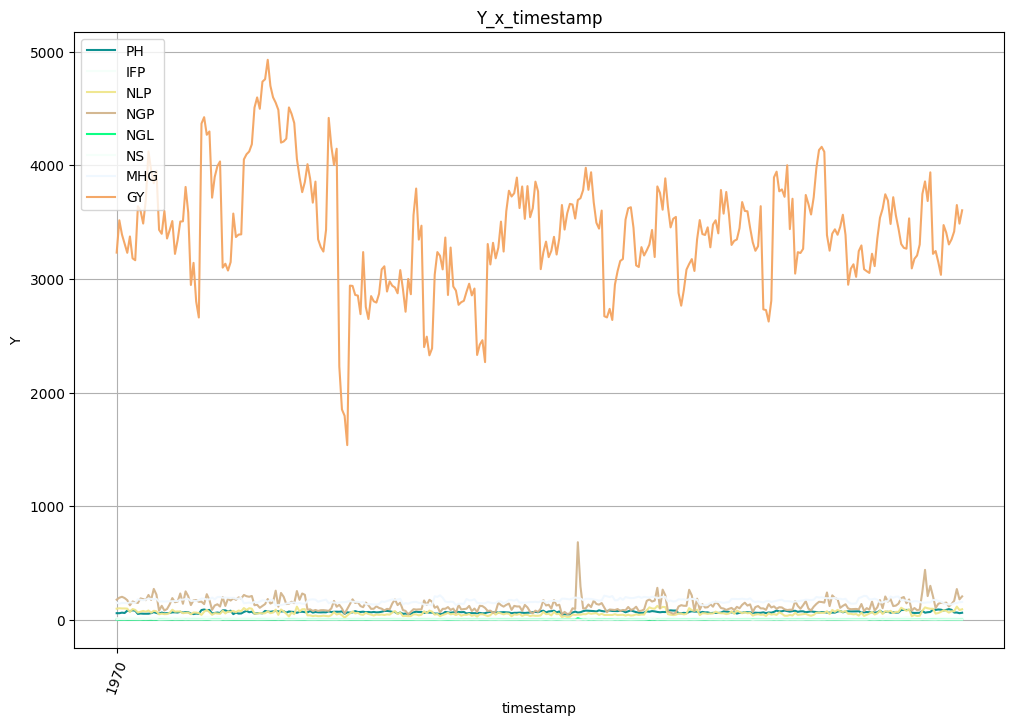

In [6]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    {'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    {'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    {'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    {'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    {'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    {'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    {'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



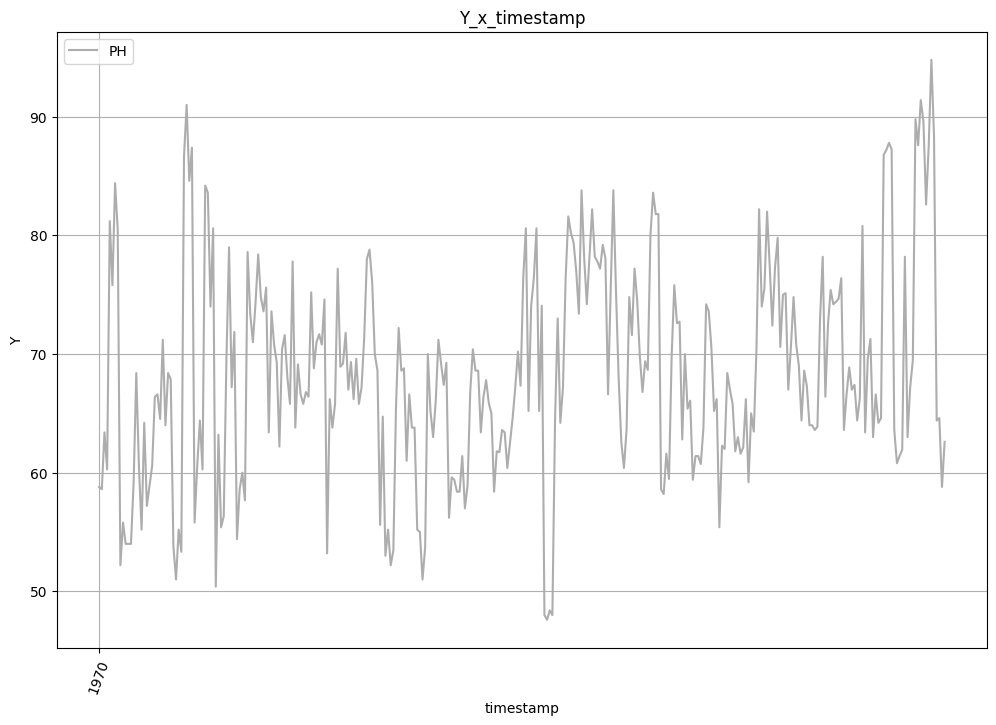

In [7]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



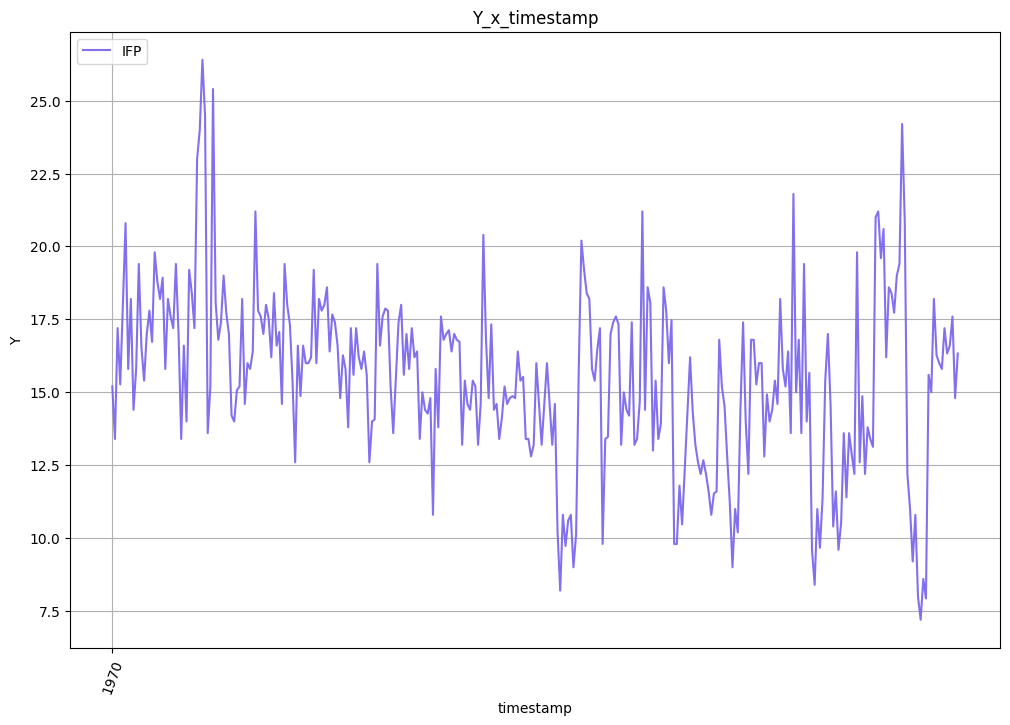

In [8]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    {'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



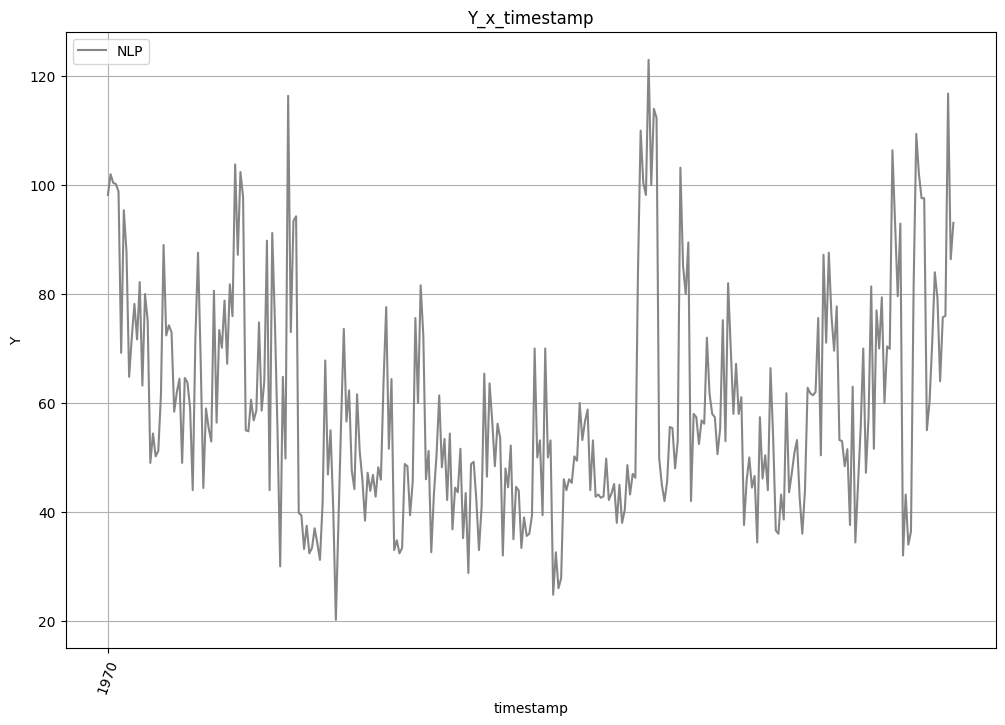

In [9]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    {'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



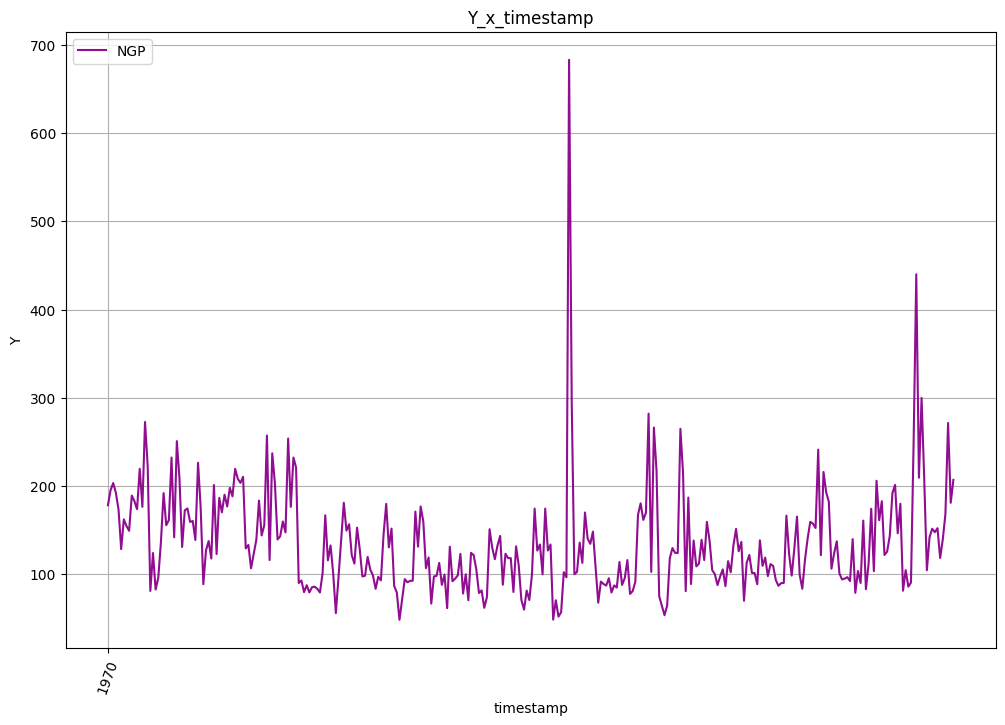

In [11]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    {'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



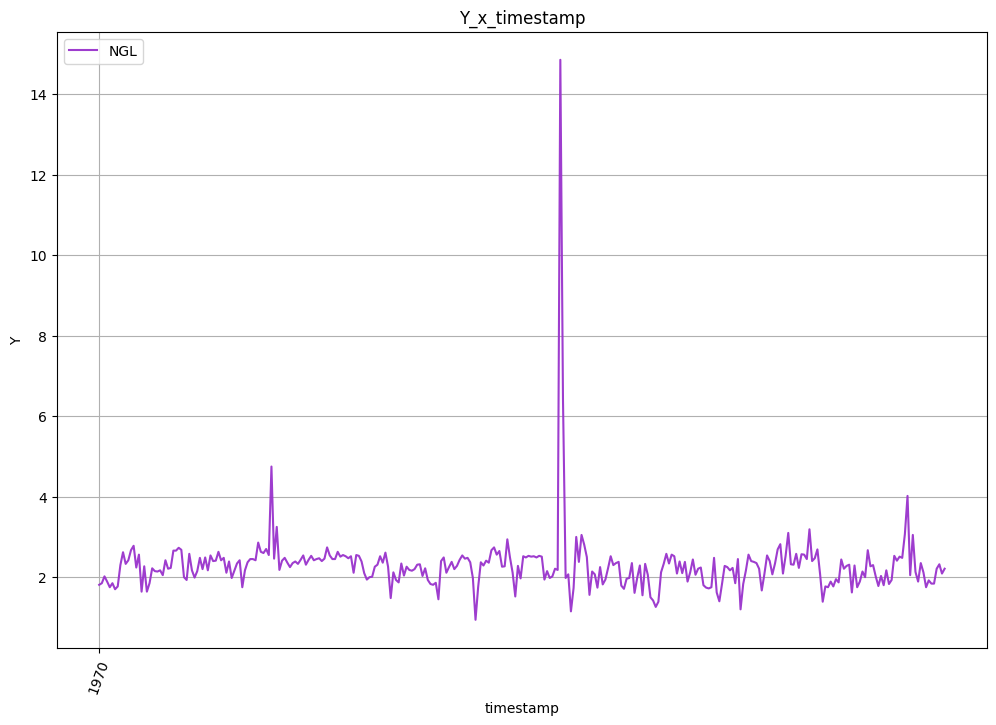

In [15]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    {'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



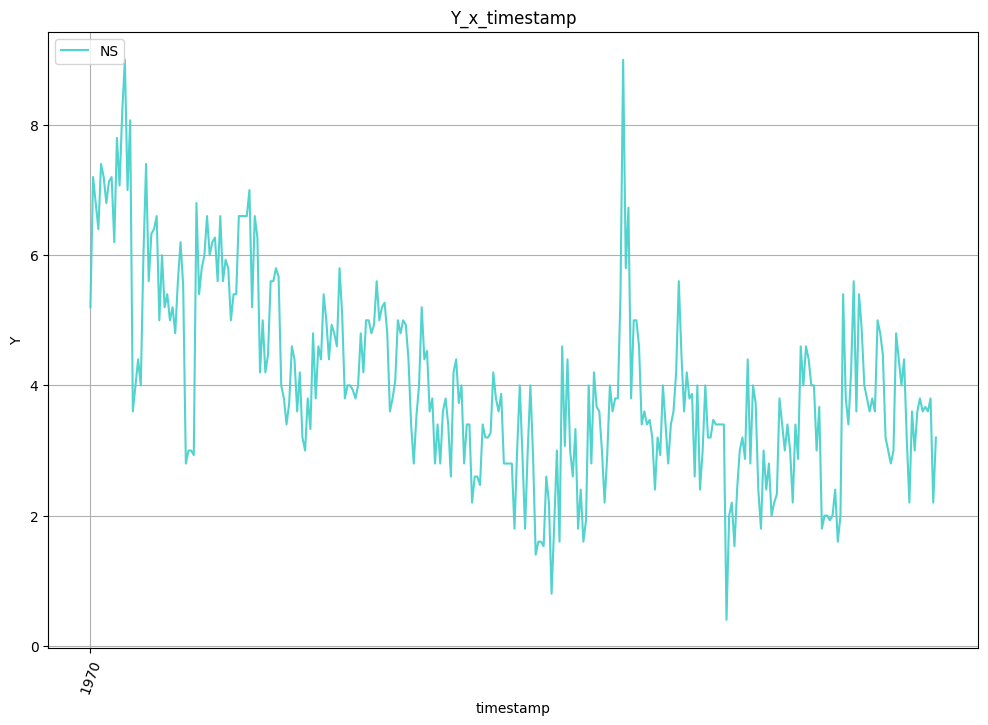

In [17]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    {'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



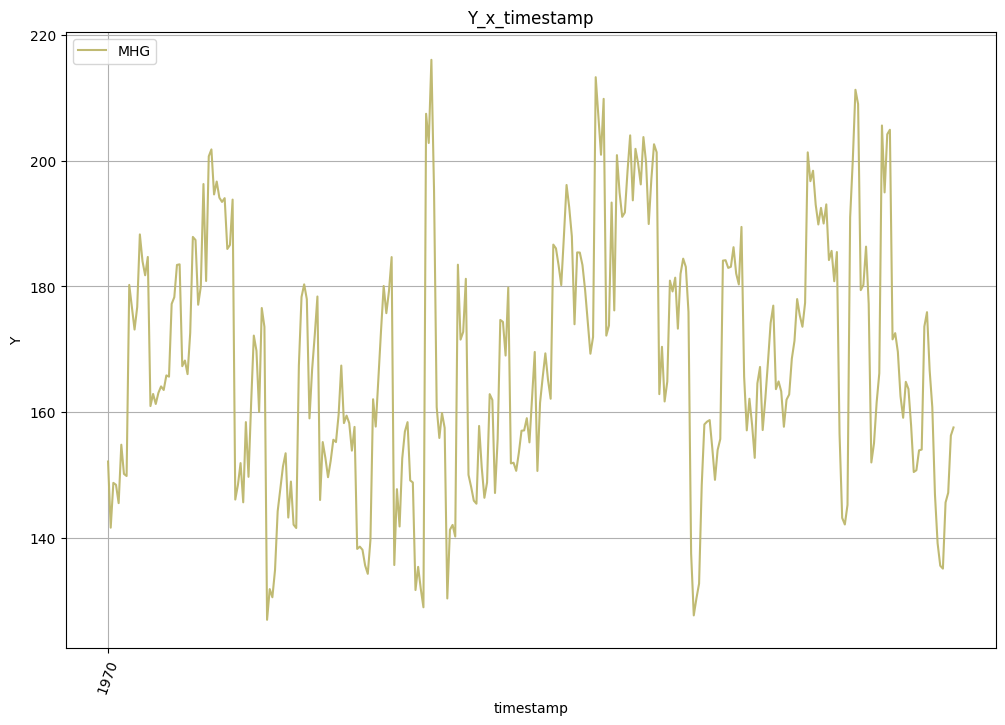

In [18]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    {'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



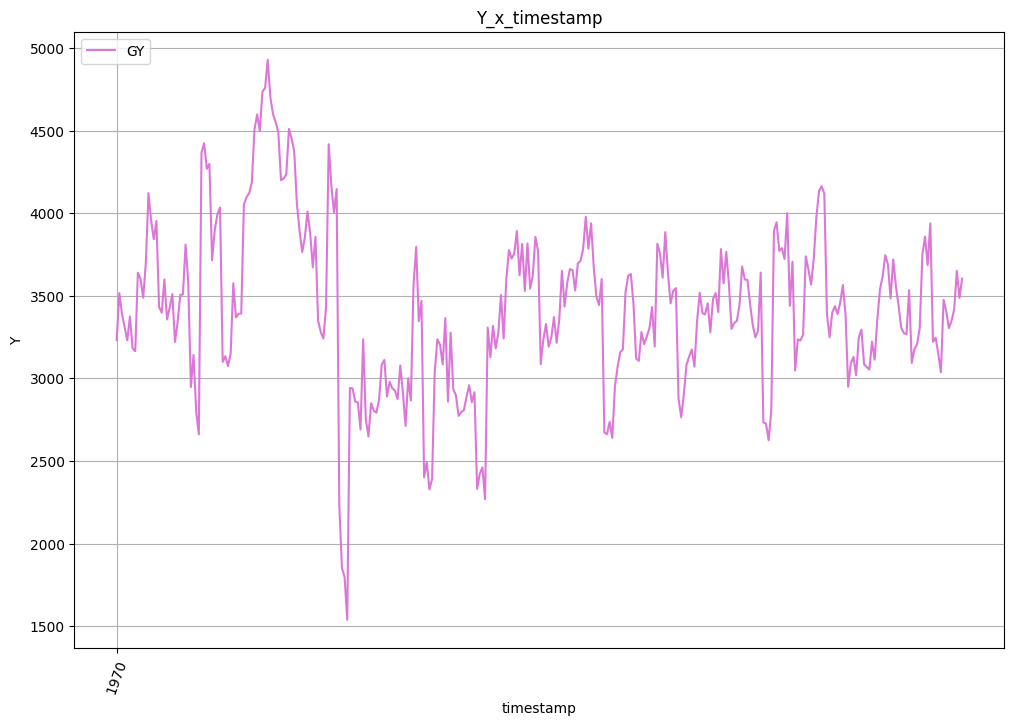

In [19]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset.index, 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset.index, 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset.index, 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset.index, 'y': dataset['NGP'], 'lab': 'NGP'},
    #{'x': dataset.index, 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset.index, 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset.index, 'y': dataset['MHG'], 'lab': 'MHG'},
    {'x': dataset.index, 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# Even if there is no timestamp, each series seems to have a clear periodic component

In [27]:
dataset.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

### **Visualizing histograms**
- Ideal number of bins is calculated through Montgomery's method.
    - Douglas C. Montgomery (2009). Introduction to Statistical Process Control, Sixth Edition, John Wiley & Sons.

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

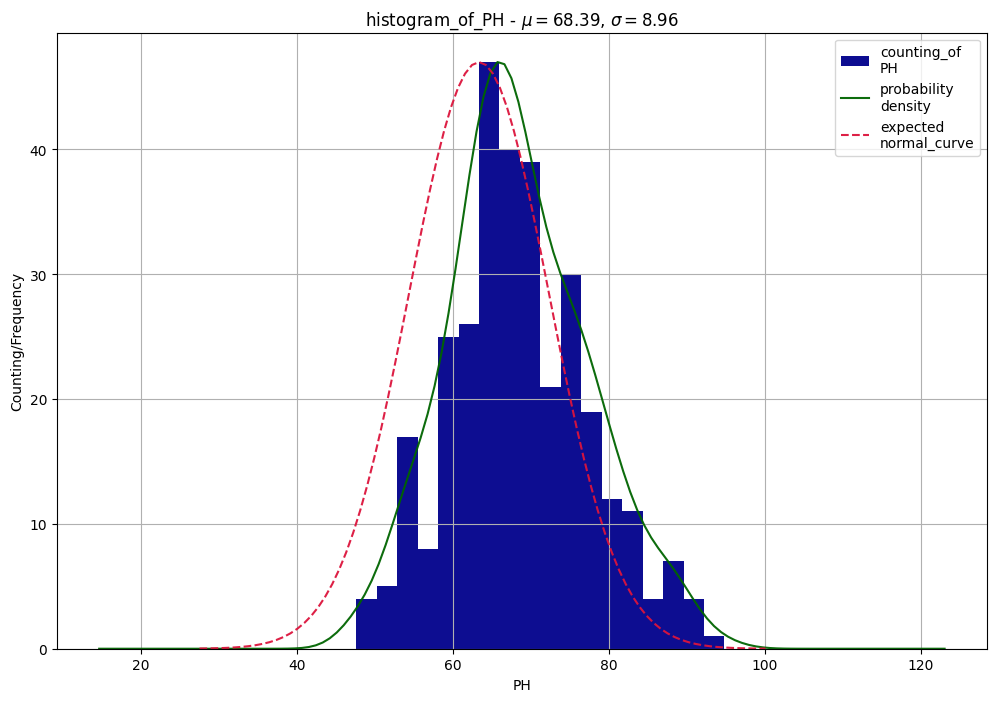

Check the general statistics from the analyzed variable:



,value
statistics,
mean,68.386781
median,67.200000
standard_deviation,8.958194
lowest_PH,47.600000
highest_PH,94.800000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,2.622222
bin_of_max_proba,63.333333




Check the frequency table:



,bin_center,count
0,47.600000,4.0
1,50.222222,5.0
2,52.844444,17.0
3,55.466667,8.0
4,58.088889,25.0
5,60.711111,26.0
6,63.333333,47.0
7,65.955556,40.0
8,68.577778,39.0
9,71.200000,21.0


In [29]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'PH'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

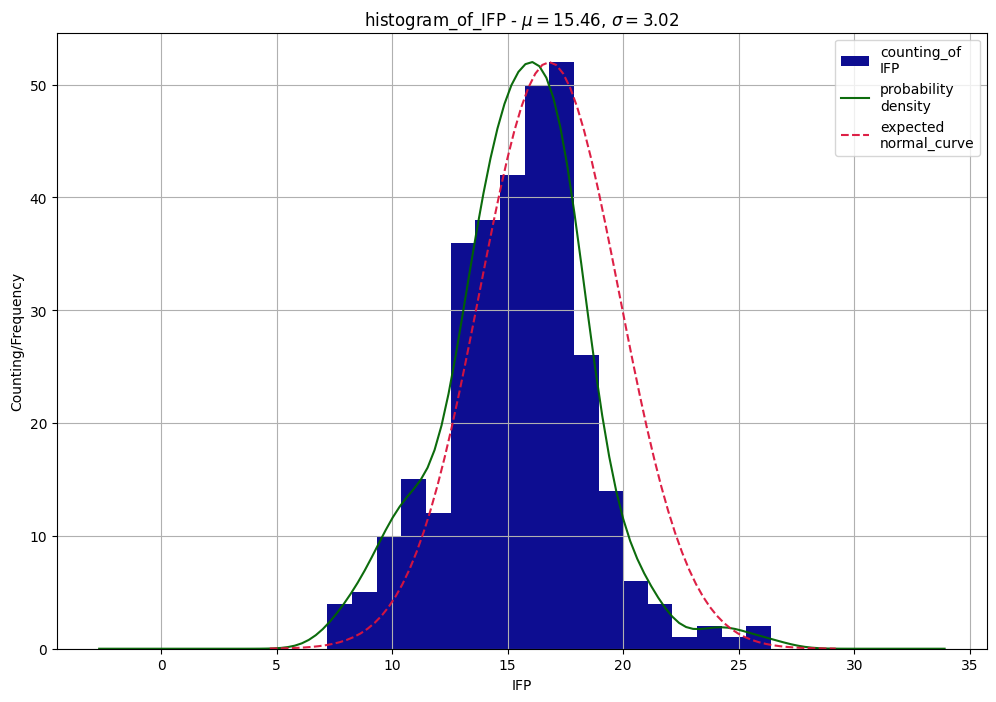

Check the general statistics from the analyzed variable:



,value
statistics,
mean,15.465000
median,15.600000
standard_deviation,3.024300
lowest_IFP,7.200000
highest_IFP,26.400000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,1.066667
bin_of_max_proba,16.800000




Check the frequency table:



,bin_center,count
0,7.200000,4.0
1,8.266667,5.0
2,9.333333,10.0
3,10.400000,15.0
4,11.466667,12.0
5,12.533333,36.0
6,13.600000,38.0
7,14.666667,42.0
8,15.733333,50.0
9,16.800000,52.0


In [30]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'IFP'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

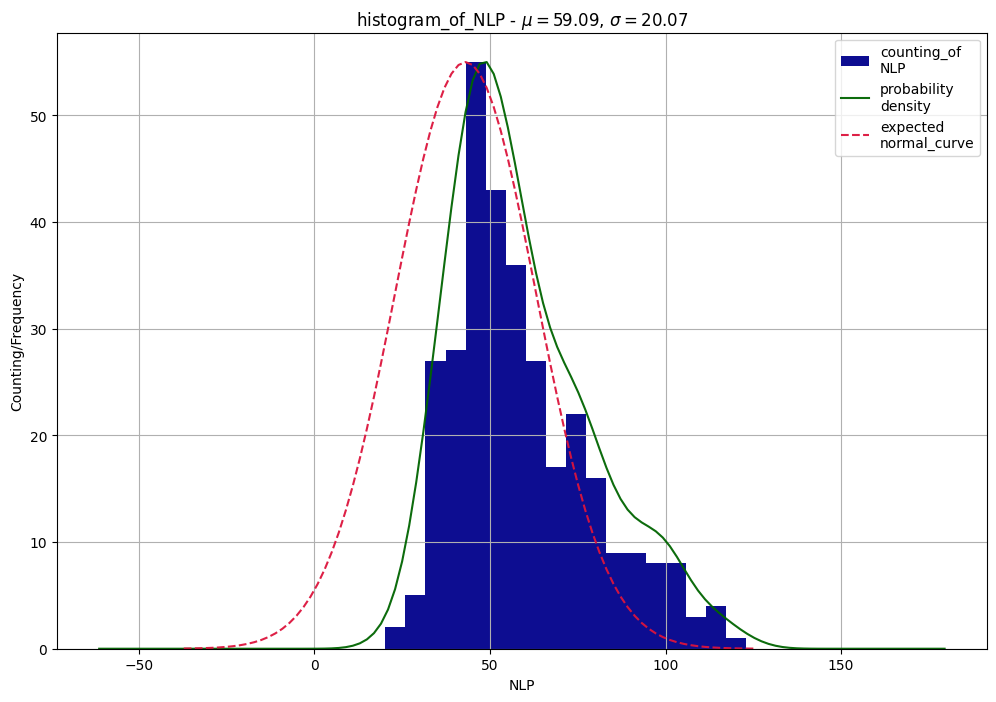

Check the general statistics from the analyzed variable:



,value
statistics,
mean,59.088313
median,54.500000
standard_deviation,20.068187
lowest_NLP,20.200000
highest_NLP,123.000000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,5.711111
bin_of_max_proba,43.044444




Check the frequency table:



,bin_center,count
0,20.200000,2.0
1,25.911111,5.0
2,31.622222,27.0
3,37.333333,28.0
4,43.044444,55.0
5,48.755556,43.0
6,54.466667,36.0
7,60.177778,27.0
8,65.888889,17.0
9,71.600000,22.0


In [31]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'NLP'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

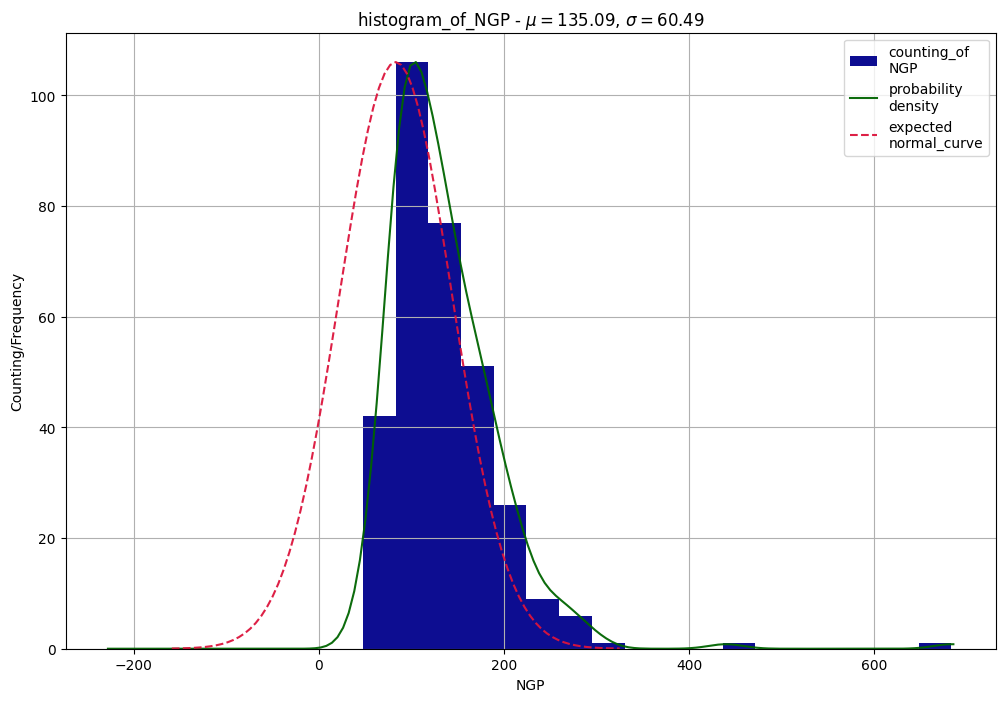

Check the general statistics from the analyzed variable:



,value
statistics,
mean,135.085844
median,123.000000
standard_deviation,60.494529
lowest_NGP,47.800000
highest_NGP,683.400000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,35.311111
bin_of_max_proba,83.111111




Check the frequency table:



,bin_center,count
0,47.800000,42.0
1,83.111111,106.0
2,118.422222,77.0
3,153.733333,51.0
4,189.044444,26.0
5,224.355556,9.0
6,259.666667,6.0
7,294.977778,1.0
8,330.288889,0.0
9,365.600000,0.0


In [32]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'NGP'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

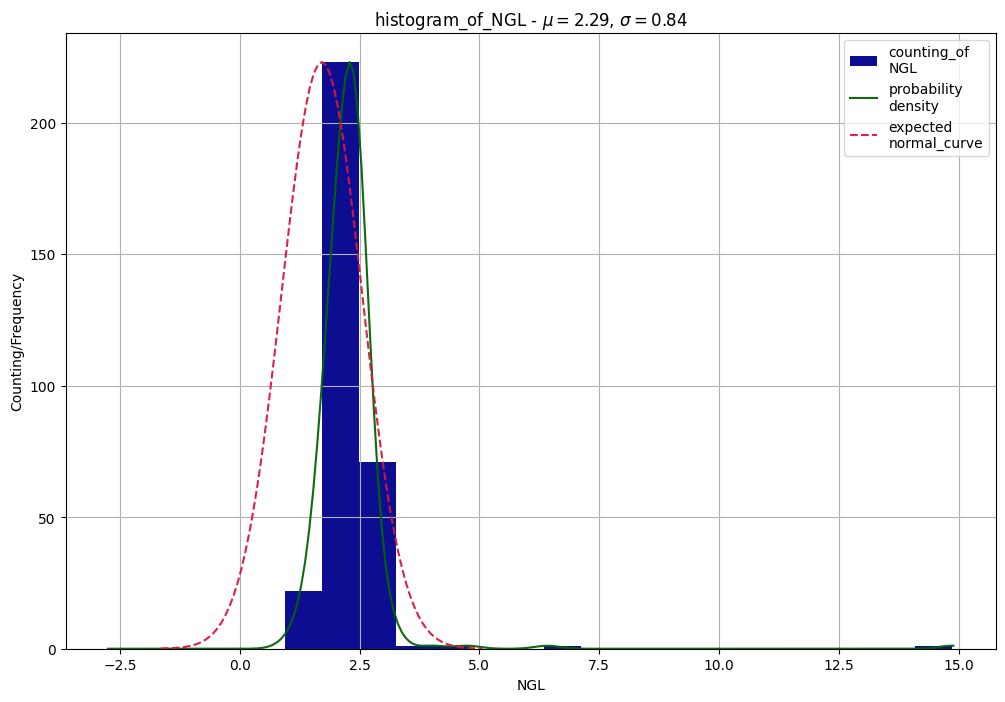

Check the general statistics from the analyzed variable:



,value
statistics,
mean,2.290844
median,2.280000
standard_deviation,0.840116
lowest_NGL,0.940000
highest_NGL,14.860000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,0.773333
bin_of_max_proba,1.713333




Check the frequency table:



,bin_center,count
0,0.940000,22.0
1,1.713333,223.0
2,2.486667,71.0
3,3.260000,1.0
4,4.033333,1.0
5,4.806667,0.0
6,5.580000,0.0
7,6.353333,1.0
8,7.126667,0.0
9,7.900000,0.0


In [33]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'NGL'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

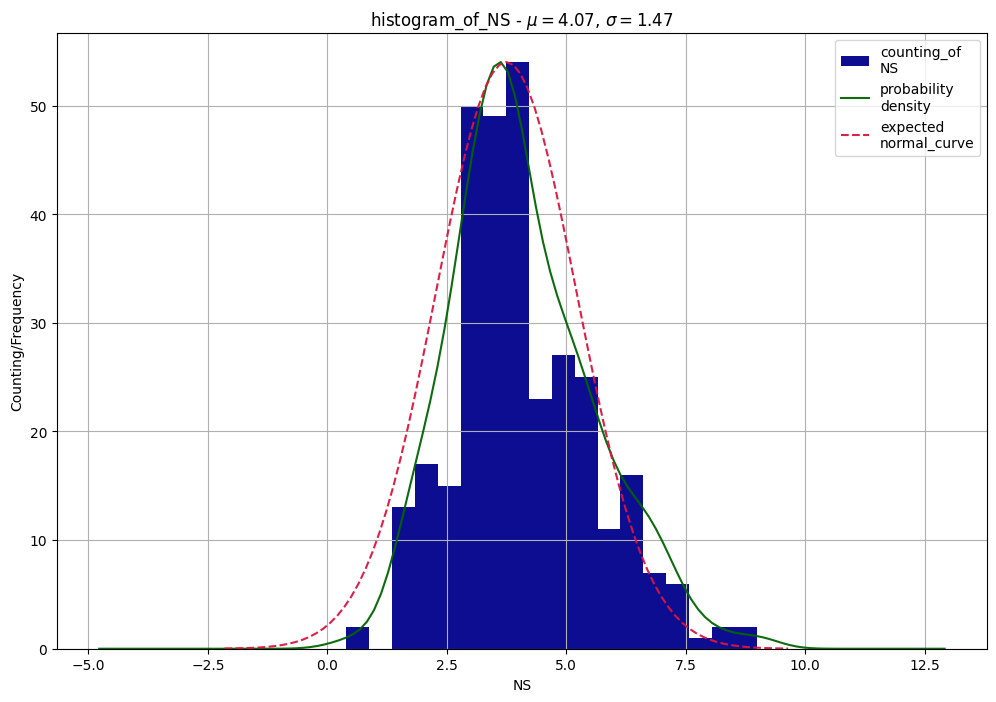

Check the general statistics from the analyzed variable:



,value
statistics,
mean,4.071656
median,3.800000
standard_deviation,1.474531
lowest_NS,0.400000
highest_NS,9.000000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,0.477778
bin_of_max_proba,3.744444




Check the frequency table:



,bin_center,count
0,0.400000,2.0
1,0.877778,0.0
2,1.355556,13.0
3,1.833333,17.0
4,2.311111,15.0
5,2.788889,50.0
6,3.266667,49.0
7,3.744444,54.0
8,4.222222,23.0
9,4.700000,27.0


In [34]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'NS'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

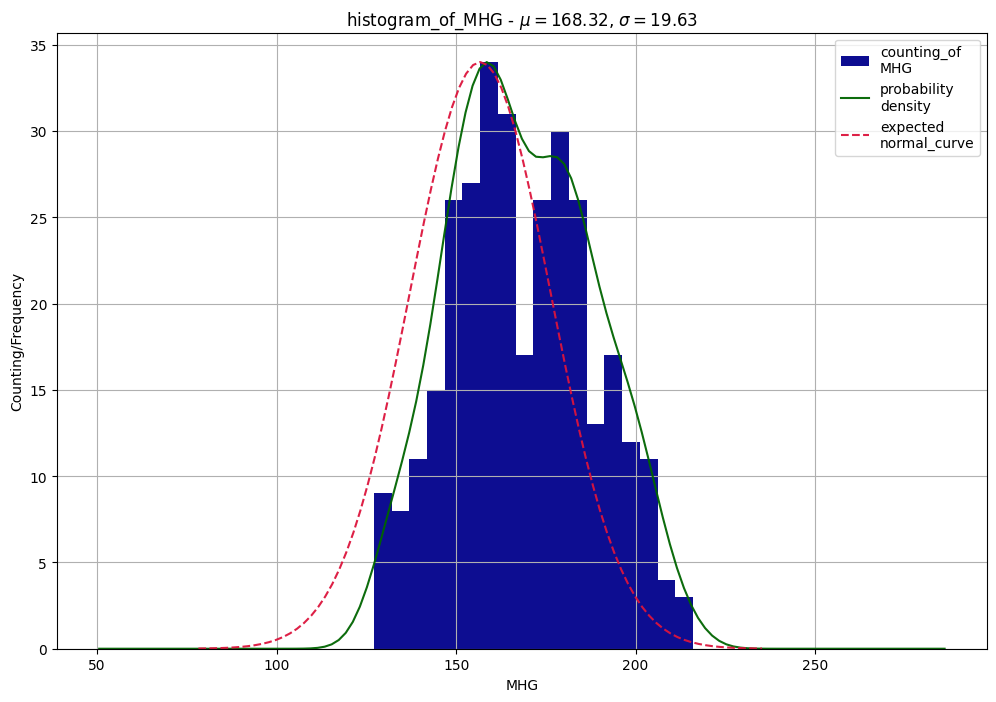

Check the general statistics from the analyzed variable:



,value
statistics,
mean,168.322313
median,166.150000
standard_deviation,19.625566
lowest_MHG,127.060000
highest_MHG,216.000000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,4.941111
bin_of_max_proba,156.706667




Check the frequency table:



,bin_center,count
0,127.060000,9.0
1,132.001111,8.0
2,136.942222,11.0
3,141.883333,15.0
4,146.824444,26.0
5,151.765556,27.0
6,156.706667,34.0
7,161.647778,31.0
8,166.588889,17.0
9,171.530000,26.0


In [35]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'MHG'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Ideal number of histogram bins calculated through Montgomery's method = 18 bins.



<Figure size 640x480 with 0 Axes>

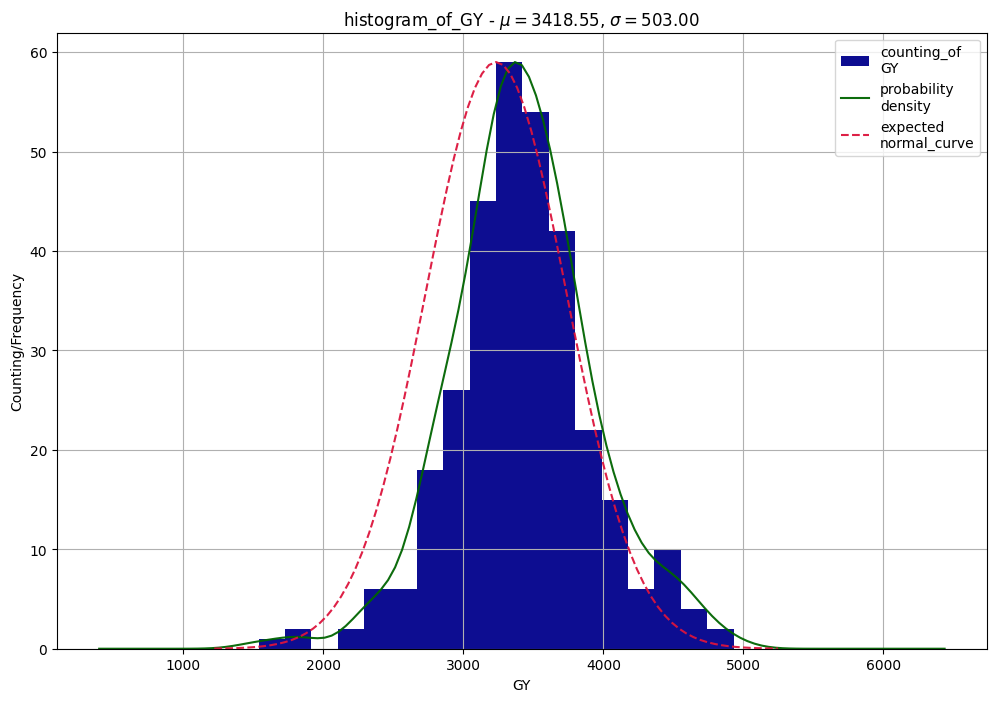

Check the general statistics from the analyzed variable:



,value
statistics,
mean,3418.553794
median,3397.276724
standard_deviation,503.003602
lowest_GY,1538.230000
highest_GY,4930.000000
count_of_values,320.000000
number_of_bins,19.000000
bin_size,188.431667
bin_of_max_proba,3234.115000




Check the frequency table:



,bin_center,count
0,1538.230000,1.0
1,1726.661667,2.0
2,1915.093333,0.0
3,2103.525000,2.0
4,2291.956667,6.0
5,2480.388333,6.0
6,2668.820000,18.0
7,2857.251667,26.0
8,3045.683333,45.0
9,3234.115000,59.0


In [36]:
# REMEMBER: A histogram is the representation of a statistical distribution
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

# 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'
COLUMN_TO_ANALYZE = 'GY'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 18
# This parameter must be an integer number: it represents the total of bins of the
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# All variables have low or no distortion and are higher than zero. The logarithm transform is adequate for scaling.

### **Plotting a bar chart**
- Bars may be vertically or horizontally oriented.
- Bar charts are plotted after selecting an aggregation function, and the cumulative percent curve may be obtained and plotted with the bars (in secondary axis).
- To obtain a **Pareto chart**, keep `aggregate_function = 'sum'`, `calculate_and_plot_cumulative_percent = True`, and `orientation = 'vertical'`.
- For obtaining the **data distribution of categorical variables**, select any numeric column as the response, and set `aggregate_function = 'count'`. You can also set `plot_cumulative_percent = True` to compare the frequencies of each possible value.

### Use this function for obtaining the statistical distributions for categorical variables

In [20]:
dataset.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable count_of_entries.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Cultivar,count_of_entries,count_of_entries_cumsum,count_of_entries_cum_pct
0,74K75RSF CE,8,8,2.5
1,77HO111I2X - GUAPORÉ,8,16,5.0
2,79I81RSF IPRO,8,24,7.5
3,82HO111 IPRO - HO COXIM IPRO,8,32,10.0
4,82I78RSF IPRO,8,40,12.5
5,83IX84RSF I2X,8,48,15.0
6,96R29 IPRO,8,56,17.5
7,97Y97 IPRO,8,64,20.0
8,98R30 CE,8,72,22.5
9,ADAPTA LTT 8402 IPRO,8,80,25.0


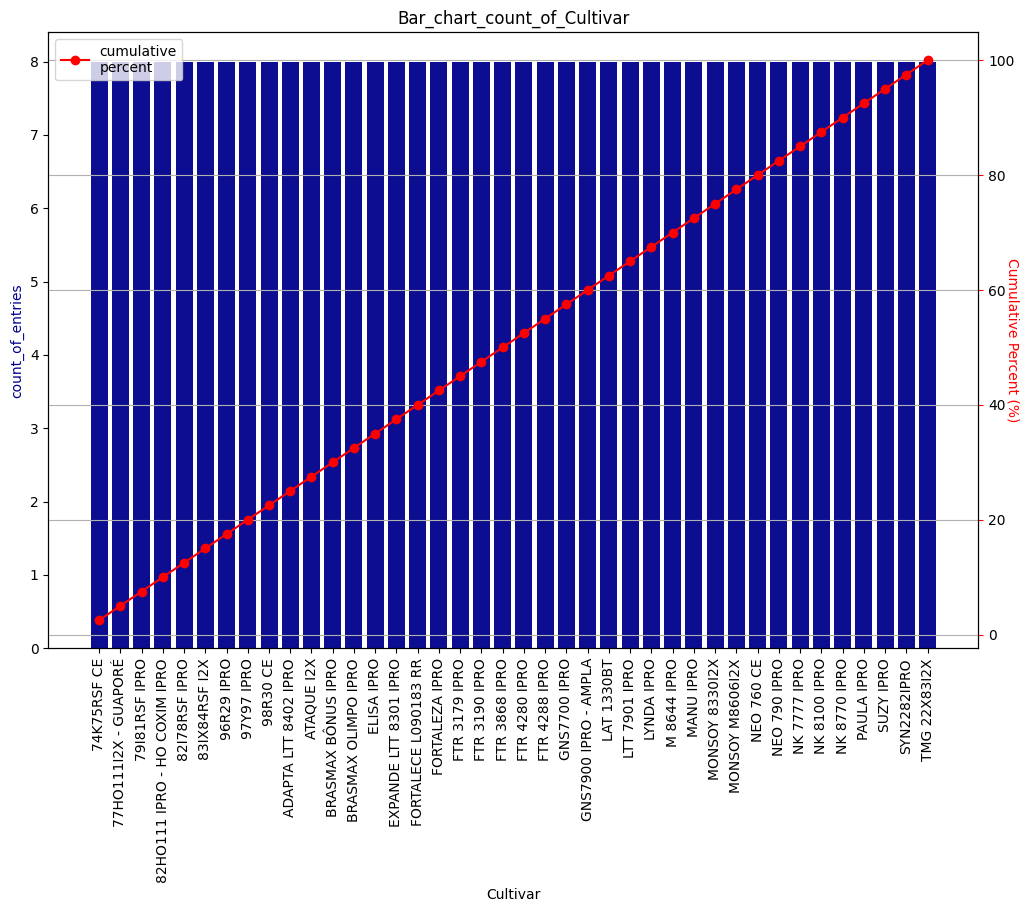

In [25]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Cultivar'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name
# of the column to be analyzed. e.g.
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = "GY"
# RESPONSE_VAR_NAME: string (inside quotes) containing the name
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'count'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 90
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df.
# Simply modify this object on the left of equality:
aggregated_sorted_df = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable count_of_entries.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Season,count_of_entries,count_of_entries_cumsum,count_of_entries_cum_pct
0,1,160,160,50.0
1,2,160,320,100.0


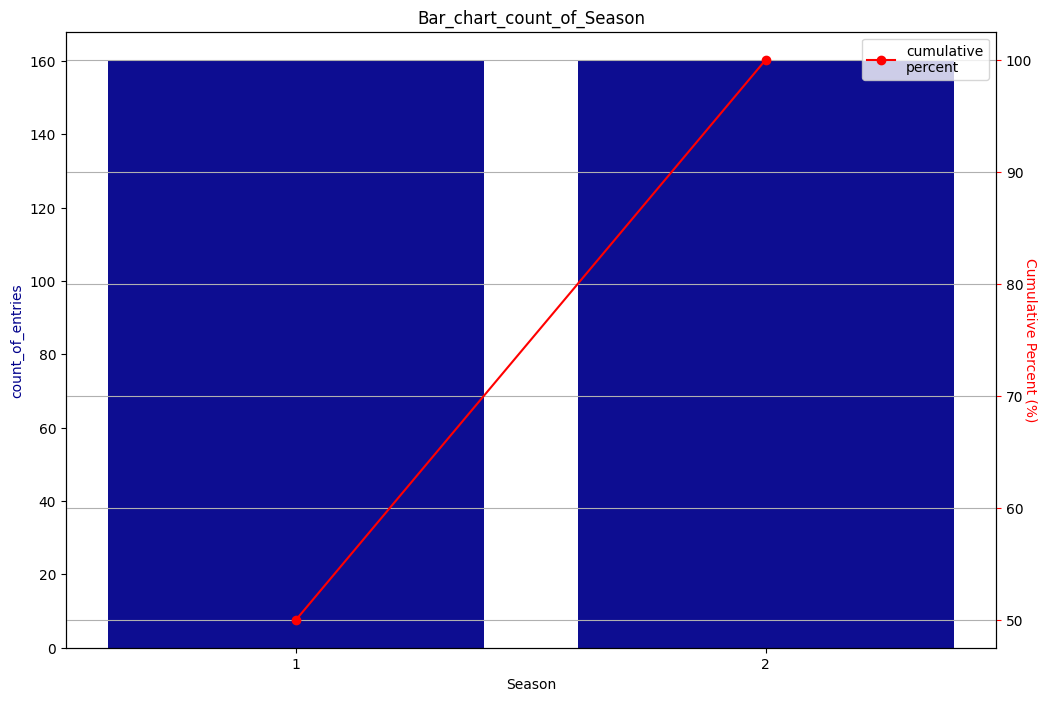

In [22]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Season'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name
# of the column to be analyzed. e.g.
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = "GY"
# RESPONSE_VAR_NAME: string (inside quotes) containing the name
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'count'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df.
# Simply modify this object on the left of equality:
aggregated_sorted_df = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Successfully calculated cumulative sum and cumulative percent correspondent to the response variable count_of_entries.
Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:



,Repetition,count_of_entries,count_of_entries_cumsum,count_of_entries_cum_pct
0,1,80,80,25.0
1,2,80,160,50.0
2,3,80,240,75.0
3,4,80,320,100.0


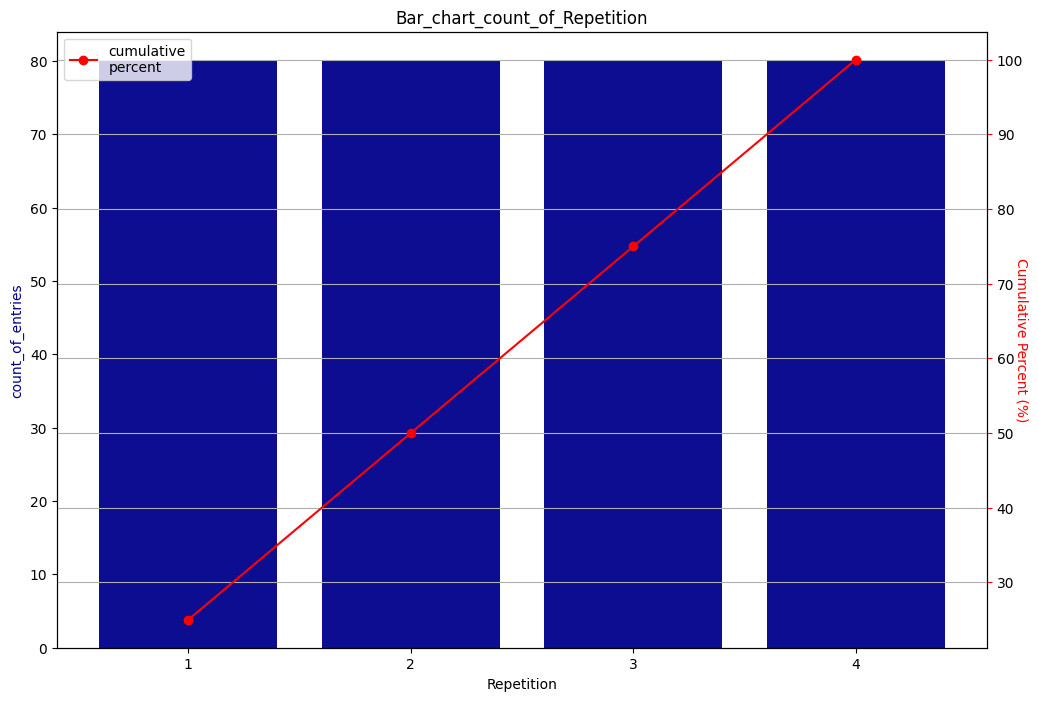

In [26]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'Repetition'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name
# of the column to be analyzed. e.g.
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = "GY"
# RESPONSE_VAR_NAME: string (inside quotes) containing the name
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'count'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance', 'count',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'bar_chart.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# New dataframe saved as aggregated_sorted_df.
# Simply modify this object on the left of equality:
aggregated_sorted_df = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
# All classes are balanced and seems that data was collected through two seasons (two years), equally spaced in 4 (every 3 months).

### **Obtaining the correlation plot**
- The Pandas method dataset.corr() calculates the Pearson's correlation coefficients R.
- Pearson's correlation coefficients R go from -1 to 1.
- These coefficients are R, not R².

#### To obtain the coefficients R², we raise the results to the 2nd power, i.e., we calculate (dataset.corr())**2
- R² goes from 0 to 1, where 1 represents the perfect correlation.

ATTENTION! The analysis will be performed only for the numeric variables.
Categorical columns will be automatically ignored.



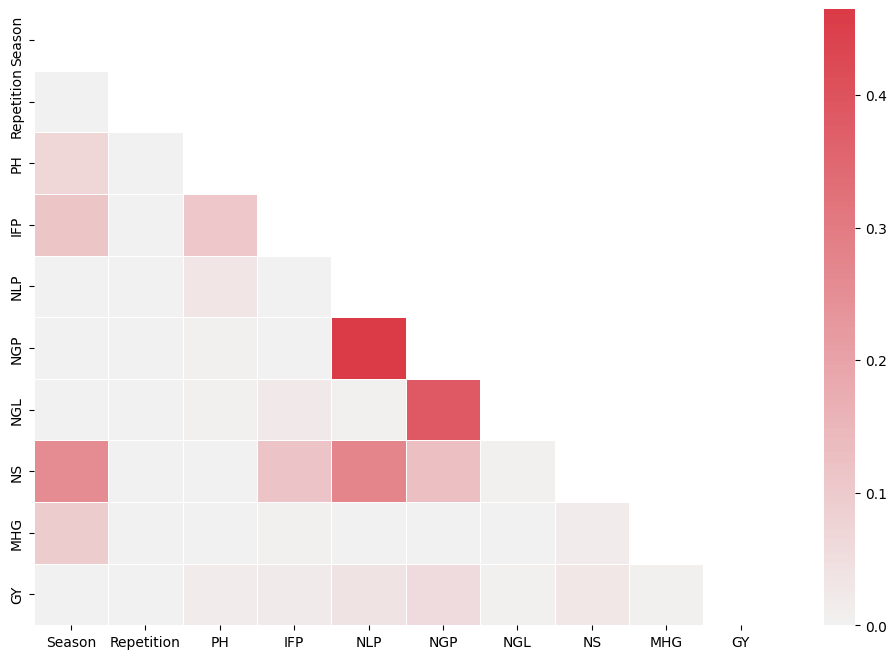

ATTENTION: The correlation plots show the linear correlations R², which go from 0 (none correlation) to 1 (perfect correlation). Obviously, the main diagonal always shows R² = 1, since the data is perfectly correlated to itself.

The returned correlation matrix, on the other hand, presents the linear coefficients of correlation R, not R². R values go from -1 (perfect negative correlation) to 1 (perfect positive correlation).

None of these coefficients take non-linear relations and the presence of a multiple linear correlation in account. For these cases, it is necessary to calculate R² adjusted, which takes in account the presence of multiple preditors and non-linearities.

Correlation matrix - numeric results:



,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
Season,1.000000e+00,1.725361e-16,0.268523,-0.337796,0.056059,-0.002469,-0.010543,-0.506016,0.307912,-0.019710
MHG,3.079121e-01,1.368809e-02,-0.046618,-0.071123,-0.000687,0.032085,0.051604,-0.129252,1.000000,0.074552
PH,2.685229e-01,1.454702e-03,1.000000,0.325370,0.172737,0.063474,-0.081961,-0.048734,-0.046618,0.123281
NLP,5.605933e-02,1.939016e-04,0.172737,0.053085,1.000000,0.681794,-0.062122,0.521903,-0.000687,0.198741
Repetition,1.725361e-16,1.000000e+00,0.001455,0.016847,0.000194,0.011717,0.015945,-0.006465,0.013688,-0.005697
NGP,-2.469477e-03,1.171739e-02,0.063474,-0.057423,0.681794,1.000000,0.621507,0.359697,0.032085,0.238883
NGL,-1.054330e-02,1.594473e-02,-0.081961,-0.151598,-0.062122,0.621507,1.000000,-0.073567,0.051604,0.077404
GY,-1.970989e-02,-5.696533e-03,0.123281,0.139090,0.198741,0.238883,0.077404,0.167022,0.074552,1.000000
IFP,-3.377963e-01,1.684695e-02,0.325370,1.000000,0.053085,-0.057423,-0.151598,0.344360,-0.071123,0.139090
NS,-5.060156e-01,-6.464545e-03,-0.048734,0.344360,0.521903,0.359697,-0.073567,1.000000,-0.129252,0.167022


In [37]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_CORR = None
#RESPONSES_TO_RETURN_CORR - keep as None to return the full correlation tensor.
# If you want to display the correlations for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_corr = ['response1'] for a single response
# responses_to_return_corr = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.

SET_RETURNED_LIMIT = None
# SET_RETURNED_LIMIT = None - This variable will only present effects in case you have
# provided a response feature to be returned. In this case, keep set_returned_limit = None
# to return all of the correlation coefficients; or, alternatively,
# provide an integer number to limit the total of coefficients returned.
# e.g. if set_returned_limit = 10, only the ten highest coefficients will be returned.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'correlation_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as correlation_matrix. Simply modify this object on the left of equality:
correlation_matrix = correlation_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_corr = RESPONSES_TO_RETURN_CORR, set_returned_limit = SET_RETURNED_LIMIT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Obtaining the covariance matrix**

- `Cov(X,Y) ~ 0 (close to zero)`
  - Variables are independent from each other
   
- `Cov(X,Y) > 0`
  - There is a positive correlation between variables.
   
- `Cov(X,Y) < 0`
  - There is a negativ correlation between variables.

The covariance matrix between X and Y is given by:

||X|Y|
|---|---|---|
|X|Cov(X,X) = Var(X)| Cov(Y,X)|
|Y|Cov(X,Y)|Cov(Y,Y) = Var(Y)|

ATTENTION! The analysis will be performed only for the numeric variables.
Categorical columns will be automatically ignored.



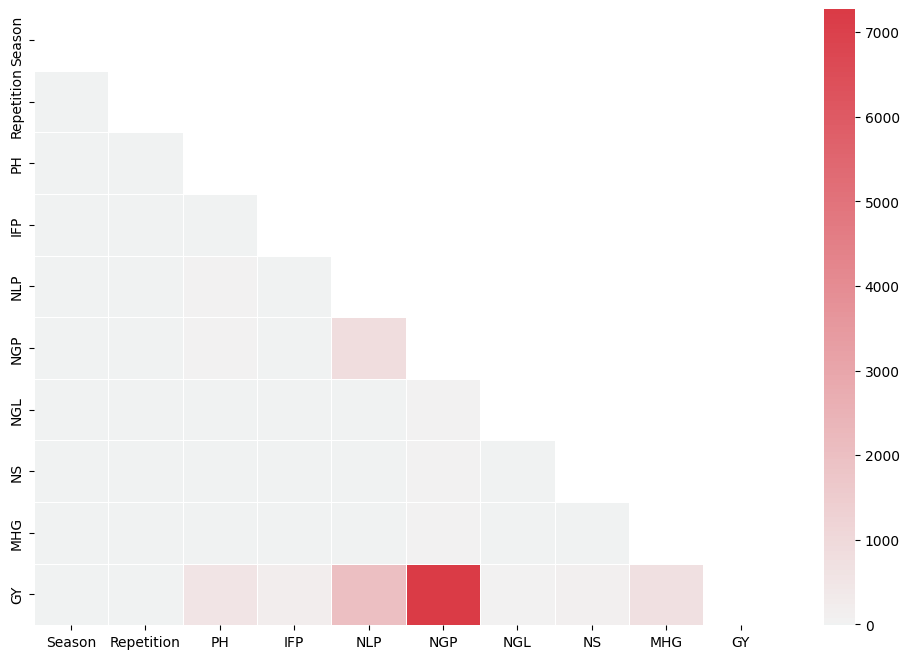



        Theory
        -----------------------------------------------------------------------------------------------------------------

        Given that E(X) = mu is the expectation (expected value) from a random variable X, the variance Var(X) is defined as:

            Var(X) = E(X²) - [E(X)]²
        
        Analogously, the covariance between X and Y, a statistic that reflects how they vary together, is defined by:

            Cov(X,Y) = E(X.Y) - E(X).E(Y)
        
        From these equations, we notice that Cov(X,X) = Var(X)

        Thus, the covariance matrix between X and Y is given by the matrix:

            Cov = [[Var(X) Cov(Y,X)]
                    [Cov(X,Y) Var(Y)]]

            where, in general, Cov(Y,X) = Cov(X,Y)
        
        For n samples with same probability of occurrence, the covariance may be calculated as:

            Cov(X,Y) = (1/n)*SUM((Xi - Mean(X))*(Yi - Mean(Y))),
            
            where (Xi,Yi) represents a single data point. In the

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
MHG,3.026207,0.300815,-8.195935,-4.221394,-0.270667,38.093067,0.850826,-3.740351,385.162840,735.952931
PH,1.204624,0.014592,80.249233,8.815011,31.053801,34.397905,-0.616835,-0.643734,-8.195935,555.503421
NLP,0.563386,0.004357,31.053801,3.221855,402.732135,827.709015,-1.047351,15.443723,-0.270667,2006.167432
Season,0.250784,0.000000,1.204624,-0.511599,0.563386,-0.074812,-0.004436,-0.373652,3.026207,-4.964837
Repetition,0.000000,1.253918,0.014592,0.057053,0.004357,0.793746,0.015000,-0.010674,0.300815,-3.208606
NGL,-0.004436,0.015000,-0.616835,-0.385175,-1.047351,31.586511,0.705795,-0.091133,0.850826,32.709296
NGP,-0.074812,0.793746,34.397905,-10.505694,827.709015,3659.588006,31.586511,32.085389,38.093067,7268.977732
NS,-0.373652,-0.010674,-0.643734,1.535648,15.443723,32.085389,-0.091133,2.174241,-3.740351,123.879253
IFP,-0.511599,0.057053,8.815011,9.146391,3.221855,-10.505694,-0.385175,1.535648,-4.221394,211.588417
GY,-4.964837,-3.208606,555.503421,211.588417,2006.167432,7268.977732,32.709296,123.879253,735.952931,253012.623793


In [38]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_COV = None
#RESPONSES_TO_RETURN_COV - keep as None to return the full correlation tensor.
# If you want to display the covariances for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_cov = ['response1'] for a single response
# responses_to_return_cov = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.


EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'covariance_matrix.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as covariance_matrix. Simply modify this object on the left of equality:
covariance_matrix = covariance_matrix_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_cov = RESPONSES_TO_RETURN_COV, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# High covariance between GY and all numeric variables, indicating that they are all important for the yield.

# High covariance between NLP and NGP, indicating collinearity between them

### **Obtaining the Variance Inflation Factors (VIFs)**
- When selecting variables for a model, we want them to be independent from each other.
- The presence of multicollinearity can mask the importance of the respective variable contributions to the target variable.
- VIF indicates the percentage of the variance inflated for each variable’s coefficient.VIF indicates the percentage of the variance inflated for each variable’s coefficient:


- `VIF = 1`
  - No collinearity.
   
- `1 < VIF < 5`
  - Moderate collinearity.
   
- `VIF >= 5`
  - High collinearity.
  - Some cases where high VIF would be acceptable:
      - Use of interaction terms, polynomial terms, or dummy variables (nominal variables with three or more categories).

In [39]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed


# New dataframe saved as variance_inflation_factor_matrix.
# Simply modify this object on the left of equality:
variance_inflation_factor_matrix = calculate_vif (df = DATASET)

ATTENTION! The analysis will be performed only for the numeric variables.
Categorical columns will be automatically ignored.


        - When selecting variables for a model, we want them to be independent from each other.
        - In cases where selected predictor variables are not independent of each other, we would not be able to determine or attribute the contribution from the various predictor variables towards the target variable. 
            — Interpretability of the model coefficients becomes an issue.
        - The presence of multicollinearity can mask the importance of the respective variable contributions to the target variable.
        - Collinear variables introduce basically the same information to the model, inflating the importance of a given variable.
        - One approach to identify multicollinearity is via the Variance Inflation Factor (VIF). 
        - VIF indicates the percentage of the variance inflated for each variable’s coefficient. 
        
        In VI

,VIF
feature,
PH,74.198552
NLP,63.303432
MHG,62.580190
NGP,55.611062
GY,47.077356
IFP,42.691087
NGL,39.502791
Season,20.931800
NS,20.028985


### **Obtaining scatter plots and simple linear regressions**
- Here, only a single prediction variable will be analyzed by once.
- The plots will show Y x X, where X is the predict or independent variable.
- The linear regressions will be of the type Y = aX + b, i.e., a single pair (X, Y) analyzed.

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



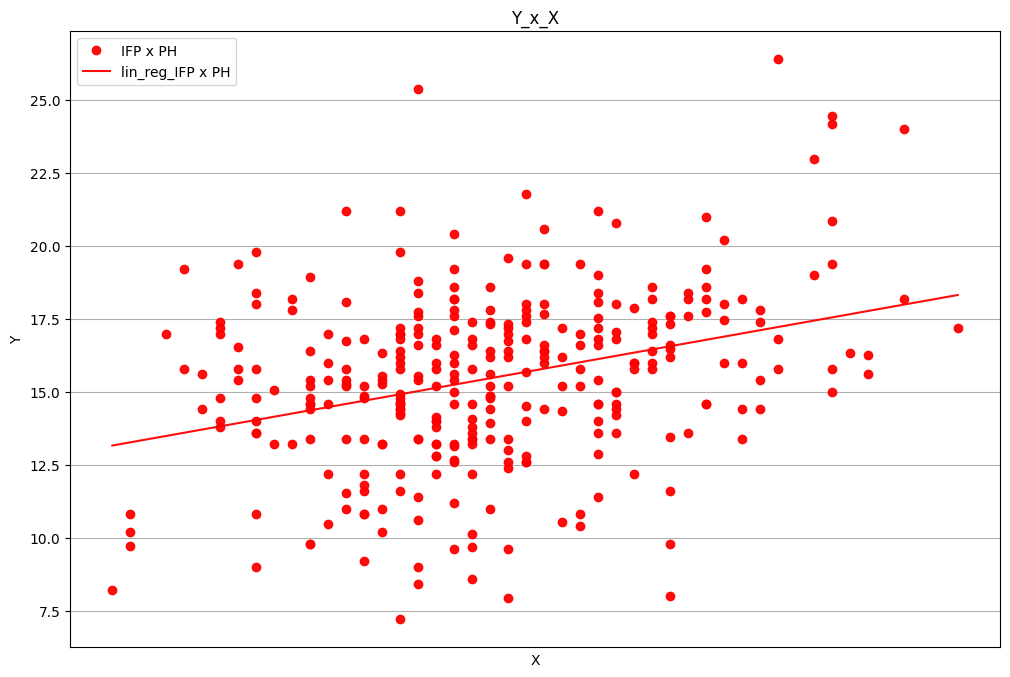


Linear regression summaries (equations and R²):

Linear regression summary for IFP x PH:



'y = 109803921.57*x + 13.16'

'R²_lin_reg = 0.1053'

In [42]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['PH'], 'y': dataset['IFP'], 'lab': 'IFP x PH'},
    #{'x': dataset['PH'], 'y': dataset['NLP'], 'lab': 'NLP x PH'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



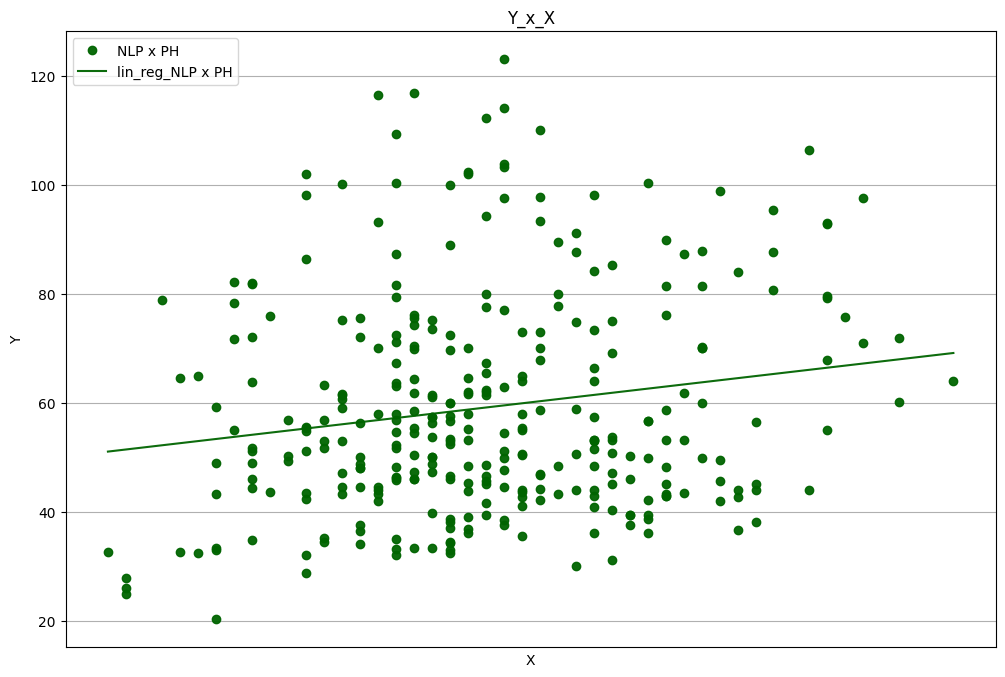


Linear regression summaries (equations and R²):

Linear regression summary for NLP x PH:



'y = 385078634.98*x + 51.01'

'R²_lin_reg = 0.0294'

In [43]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['PH'], 'y': dataset['IFP'], 'lab': 'IFP x PH'},
    {'x': dataset['PH'], 'y': dataset['NLP'], 'lab': 'NLP x PH'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



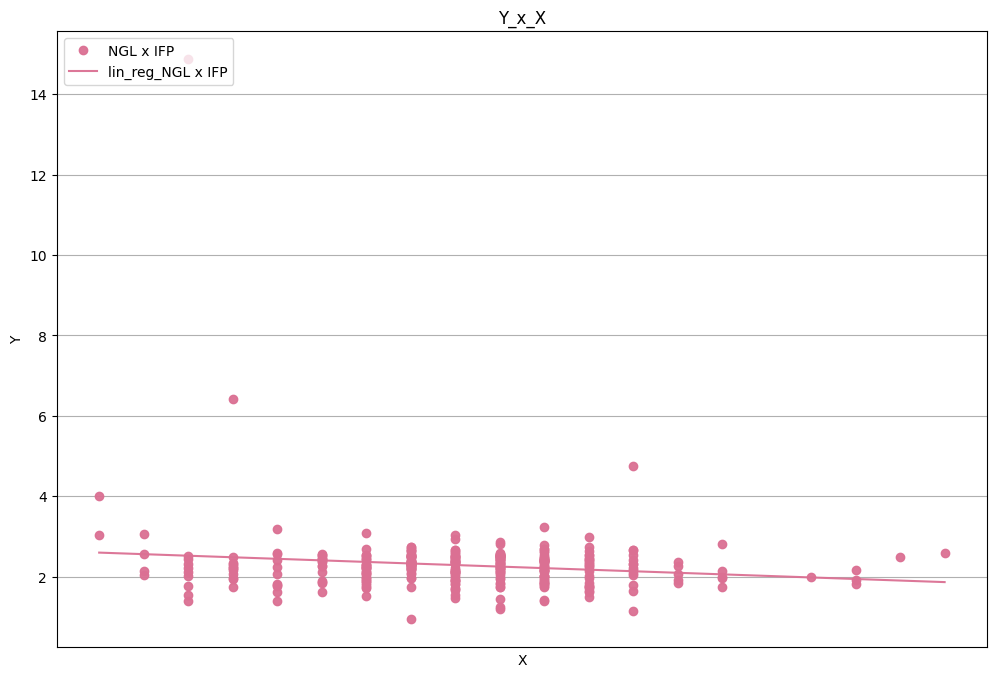


Linear regression summaries (equations and R²):

Linear regression summary for NGL x IFP:



'y = -38580940.45*x + 2.60'

'R²_lin_reg = 0.0197'

In [44]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['IFP'], 'y': dataset['NGL'], 'lab': 'NGL x IFP'},
    #{'x': dataset['IFP'], 'y': dataset['NS'], 'lab': 'NS x IFP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



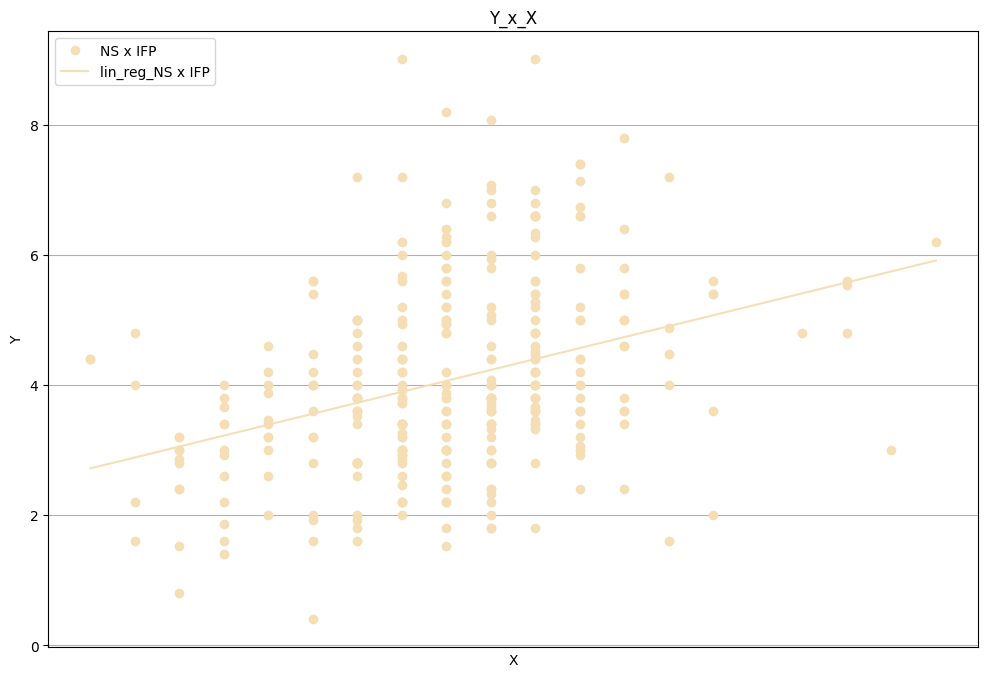


Linear regression summaries (equations and R²):

Linear regression summary for NS x IFP:



'y = 168072234.83*x + 2.72'

'R²_lin_reg = 0.1214'

In [46]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['IFP'], 'y': dataset['NGL'], 'lab': 'NGL x IFP'},
    {'x': dataset['IFP'], 'y': dataset['NS'], 'lab': 'NS x IFP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



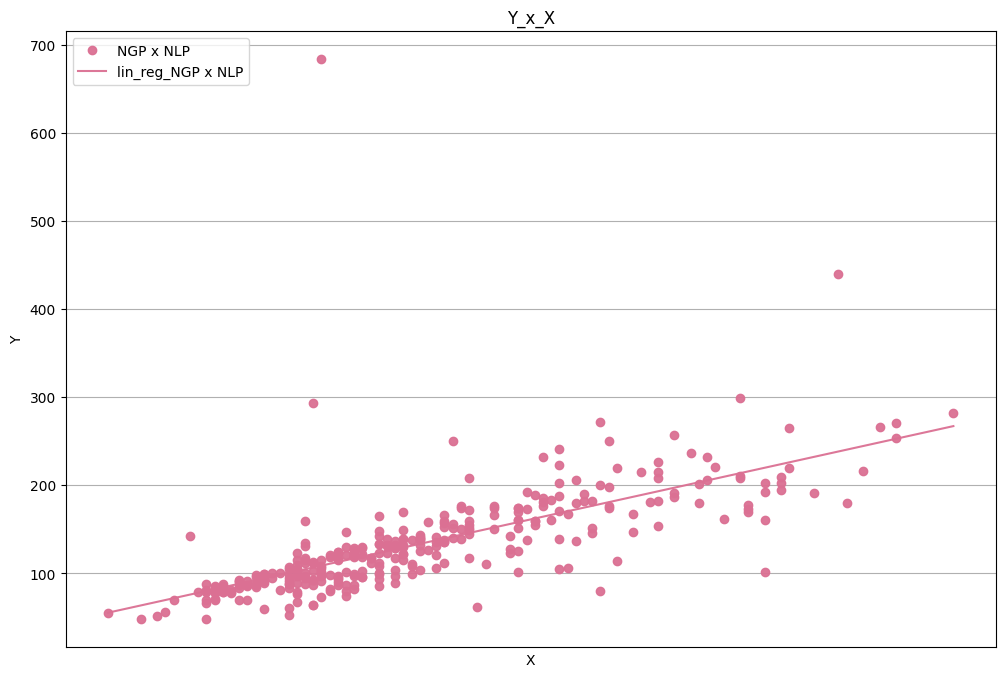


Linear regression summaries (equations and R²):

Linear regression summary for NGP x NLP:



'y = 2056079224.54*x + 55.46'

'R²_lin_reg = 0.4651'

In [48]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['NLP'], 'y': dataset['NGP'], 'lab': 'NGP x NLP'},
    #{'x': dataset['NLP'], 'y': dataset['NS'], 'lab': 'NS x NLP'},
    #{'x': dataset['NLP'], 'y': dataset['GY'], 'lab': 'GY x NLP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



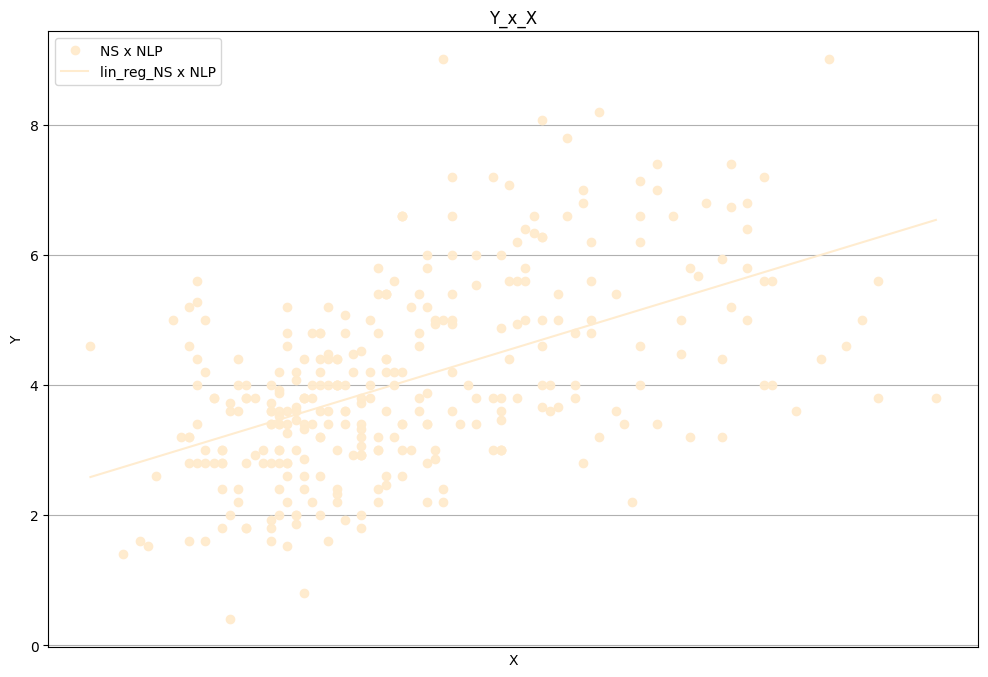


Linear regression summaries (equations and R²):

Linear regression summary for NS x NLP:



'y = 38336207.39*x + 2.59'

'R²_lin_reg = 0.2721'

In [49]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['NLP'], 'y': dataset['NGP'], 'lab': 'NGP x NLP'},
    {'x': dataset['NLP'], 'y': dataset['NS'], 'lab': 'NS x NLP'},
    #{'x': dataset['NLP'], 'y': dataset['GY'], 'lab': 'GY x NLP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



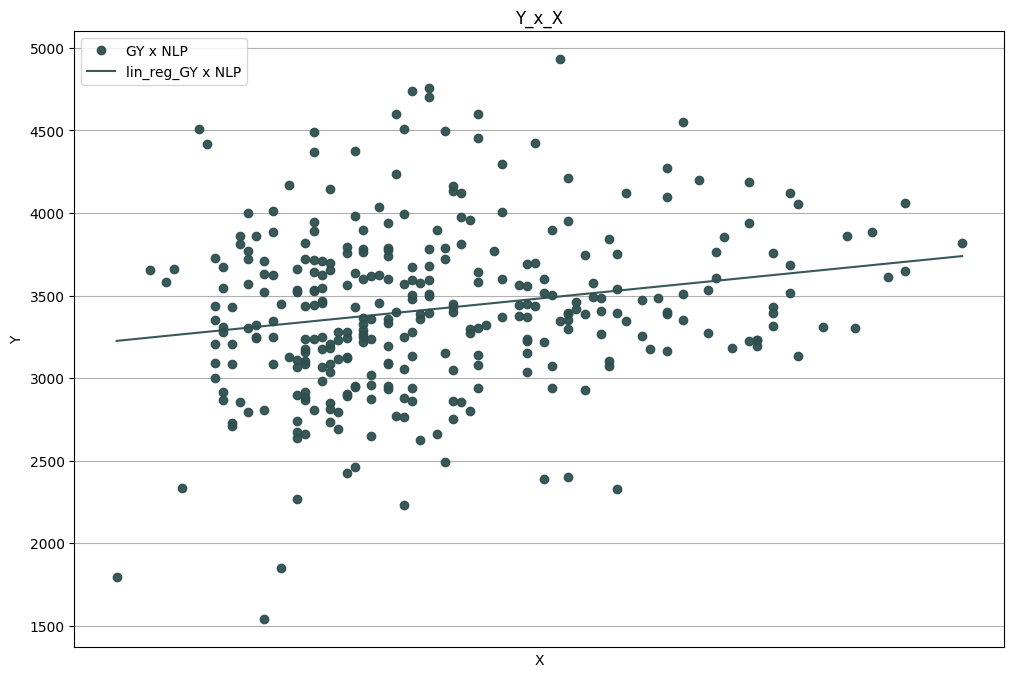


Linear regression summaries (equations and R²):

Linear regression summary for GY x NLP:



'y = 4984524252.47*x + 3225.51'

'R²_lin_reg = 0.0395'

In [51]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['NLP'], 'y': dataset['NGP'], 'lab': 'NGP x NLP'},
    #{'x': dataset['NLP'], 'y': dataset['NS'], 'lab': 'NS x NLP'},
    {'x': dataset['NLP'], 'y': dataset['GY'], 'lab': 'GY x NLP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



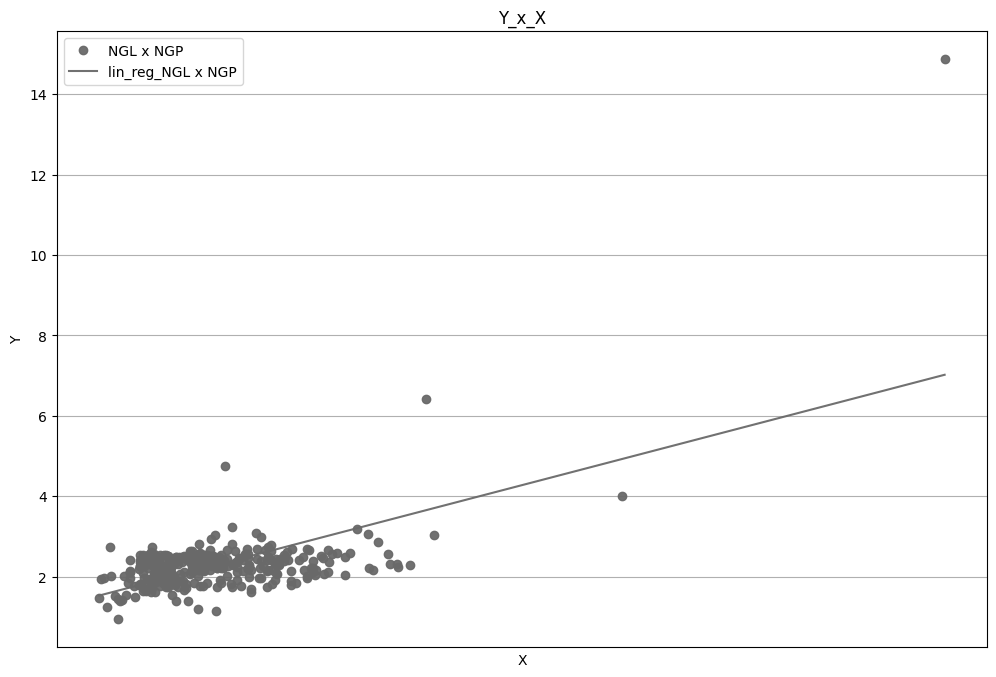


Linear regression summaries (equations and R²):

Linear regression summary for NGL x NGP:



'y = 8628706.83*x + 1.53'

'R²_lin_reg = 0.3861'

In [52]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['NGP'], 'y': dataset['NGL'], 'lab': 'NGL x NGP'},
    #{'x': dataset['NGP'], 'y': dataset['NS'], 'lab': 'NS x NGP'},
    #{'x': dataset['NGP'], 'y': dataset['GY'], 'lab': 'GY x NGP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



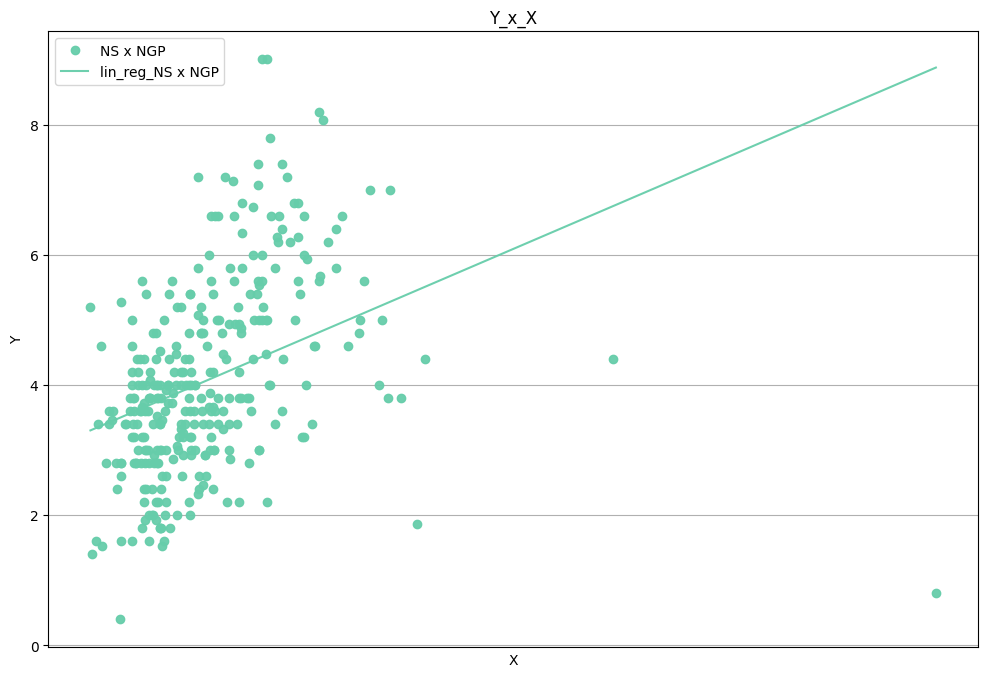


Linear regression summaries (equations and R²):

Linear regression summary for NS x NGP:



'y = 8761112.38*x + 3.30'

'R²_lin_reg = 0.1292'

In [53]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['NGP'], 'y': dataset['NGL'], 'lab': 'NGL x NGP'},
    {'x': dataset['NGP'], 'y': dataset['NS'], 'lab': 'NS x NGP'},
    #{'x': dataset['NGP'], 'y': dataset['GY'], 'lab': 'GY x NGP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



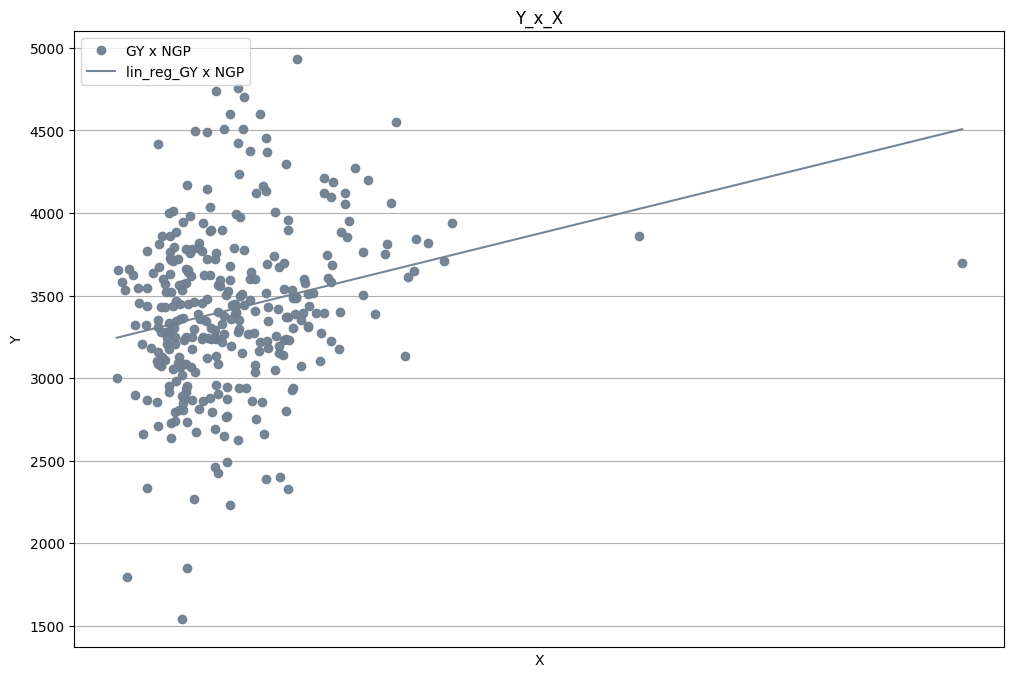


Linear regression summaries (equations and R²):

Linear regression summary for GY x NGP:



'y = 1986194248.19*x + 3244.34'

'R²_lin_reg = 0.0571'

In [56]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['NGP'], 'y': dataset['NGL'], 'lab': 'NGL x NGP'},
    #{'x': dataset['NGP'], 'y': dataset['NS'], 'lab': 'NS x NGP'},
    {'x': dataset['NGP'], 'y': dataset['GY'], 'lab': 'GY x NGP'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [58]:
dataset.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



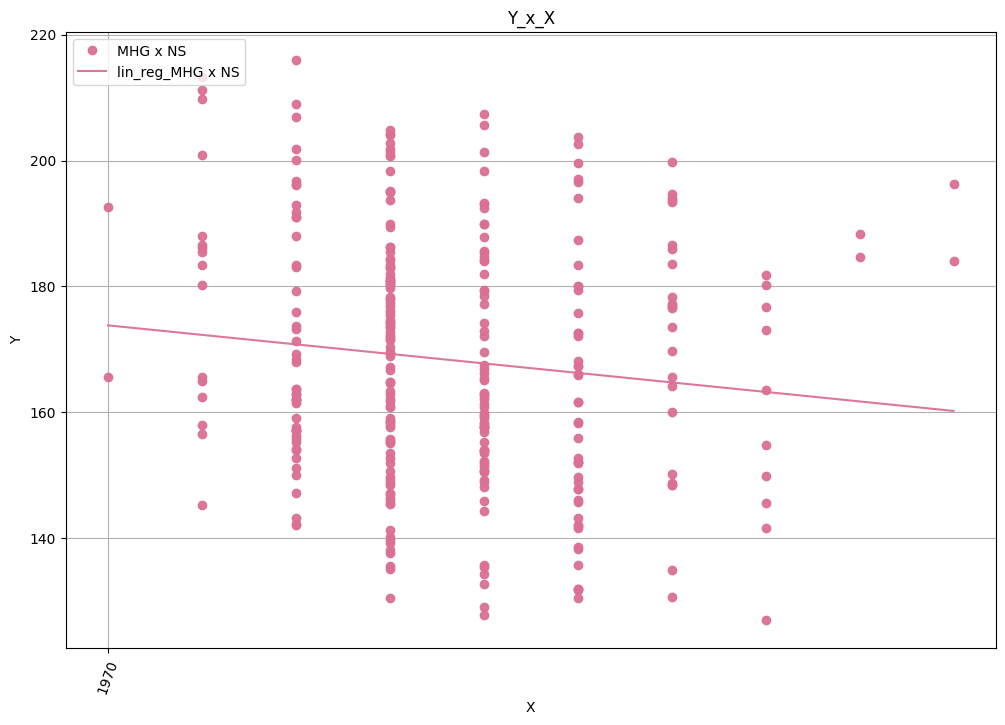


Linear regression summaries (equations and R²):

Linear regression summary for MHG x NS:



'y = -1510255208.42*x + 173.83'

'R²_lin_reg = 0.0139'

In [60]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['NS'], 'y': dataset['MHG'], 'lab': 'MHG x NS'},
    #{'x': dataset['NS'], 'y': dataset['GY'], 'lab': 'GY x NS'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.

For performing the linear regression, a sequence of floats proportional to the timestamps was created. In this sequence, check on the returned object a dictionary containing the timestamps and the correspondent integers, that keeps the distance proportion between successive timestamps. The sequence was created by calculating the timedeltas as an integer number of nanoseconds, which were converted to seconds. The first timestamp was considered time = 0.
Notice that the regression equation is based on the use of this sequence of floats as X.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



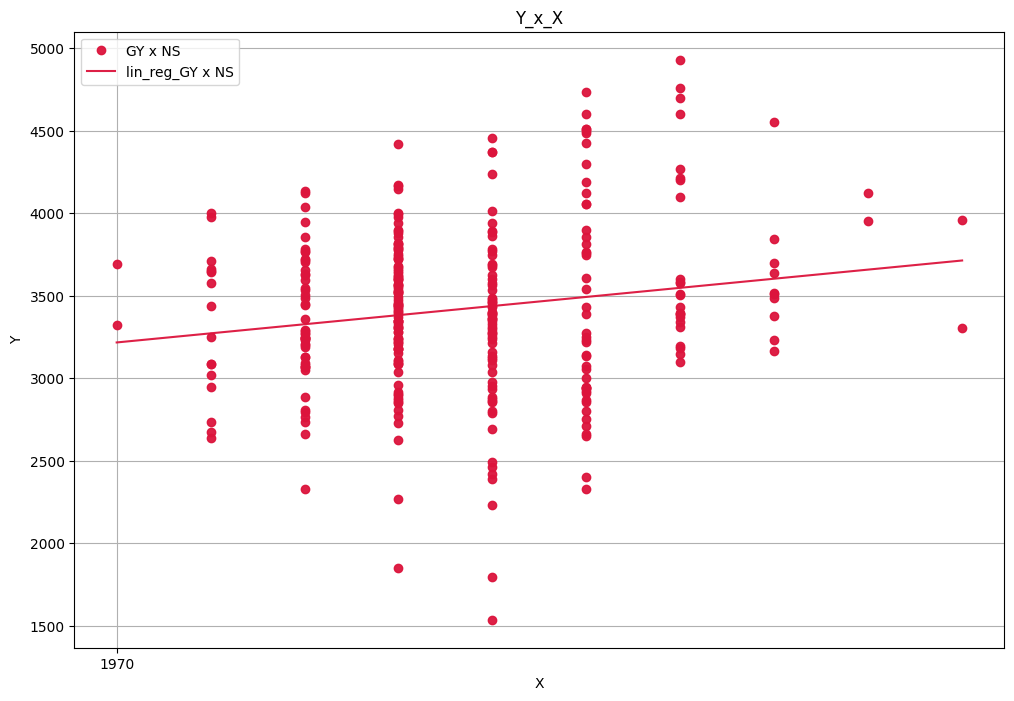


Linear regression summaries (equations and R²):

Linear regression summary for GY x NS:



'y = 55157669200.45*x + 3217.57'

'R²_lin_reg = 0.0282'

In [65]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['NS'], 'y': dataset['MHG'], 'lab': 'MHG x NS'},
    {'x': dataset['NS'], 'y': dataset['GY'], 'lab': 'GY x NS'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show
# the linear regressions calculated for each pair Y x X (i.e., each correlation
# Y = aX + b, as well as the R² coefficient calculated).
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays,
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions,
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions.
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# High covariance between NLP and NGP, indicating collinearity between them
Linear regression summary for NGP x NLP:
- y = 2056079224.54*x + 55.46
- R²_lin_reg = 0.4651

    - x = NLP
    - y = NGP

## Remove NGP from the dataset

In [12]:
dataset = dataset.drop(columns = 'NGP')

In [67]:
np.unique(dataset.Repetition)

array([1, 2, 3, 4])

# Let's create timestamps for the variables Season and Repetition
- Looking at the paper (https://editorapantanal.com.br/journal/index.php/taes/article/view/8/5)

  - Season 1:
    - Sowing: Nov.2022 and experiments in: Dec. 22, Jan., Feb., Mar. 23

  - Season 2:
    - Sowing: Dec. 2022 and experiments in Jan., Feb., Mar., Apr. 23

In [13]:
dataset['timestamp'] = None

In [14]:
dataset.loc[((dataset['Season'] == 1) & (dataset['Repetition'] == 1)), 'timestamp'] = '2022-12-01'
dataset.loc[((dataset['Season'] == 1) & (dataset['Repetition'] == 2)), 'timestamp'] = '2023-01-01'
dataset.loc[((dataset['Season'] == 1) & (dataset['Repetition'] == 3)), 'timestamp'] = '2023-02-01'
dataset.loc[((dataset['Season'] == 1) & (dataset['Repetition'] == 4)), 'timestamp'] = '2023-03-01'

dataset.loc[((dataset['Season'] == 2) & (dataset['Repetition'] == 1)), 'timestamp'] = '2023-01-01'
dataset.loc[((dataset['Season'] == 2) & (dataset['Repetition'] == 2)), 'timestamp'] = '2023-02-01'
dataset.loc[((dataset['Season'] == 2) & (dataset['Repetition'] == 3)), 'timestamp'] = '2023-03-01'
dataset.loc[((dataset['Season'] == 2) & (dataset['Repetition'] == 4)), 'timestamp'] = '2023-04-01'

dataset['timestamp'] = dataset['timestamp'].astype('datetime64[ns]')
dataset

,Season,Cultivar,Repetition,PH,IFP,NLP,NGL,NS,MHG,GY,timestamp
0,1,NEO 760 CE,1,58.80,15.20,98.20,1.81,5.20,152.20,3232.820000,2022-12-01
1,1,NEO 760 CE,2,58.60,13.40,102.00,1.85,7.20,141.69,3517.360000,2023-01-01
2,1,NEO 760 CE,3,63.40,17.20,100.40,2.02,6.80,148.81,3391.460000,2023-02-01
3,1,NEO 760 CE,4,60.27,15.27,100.20,1.89,6.40,148.50,3312.580000,2023-03-01
4,1,MANU IPRO,1,81.20,18.00,98.80,1.75,7.40,145.59,3230.990000,2022-12-01
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,1.84,3.67,135.19,3348.931034,2023-04-01
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,2.21,3.60,145.69,3418.850575,2023-01-01
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,2.32,3.80,147.24,3651.586207,2023-02-01
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,2.09,2.20,156.32,3487.931034,2023-03-01


In [ ]:
# Reorder columns

In [15]:
dataset.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGL', 'NS',
       'MHG', 'GY', 'timestamp'],
      dtype='object')

In [16]:
dataset = dataset[['timestamp', 'Season', 'Repetition', 'Cultivar', 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY']]

In [17]:
dataset = dataset.sort_values(by = ['timestamp', 'Season', 'Repetition'])
dataset = dataset.reset_index(drop = True)

In [18]:
dataset

,timestamp,Season,Repetition,Cultivar,PH,IFP,NLP,NGL,NS,MHG,GY
0,2022-12-01,1,1,NEO 760 CE,58.80,15.20,98.20,1.81,5.20,152.20,3232.820000
1,2022-12-01,1,1,MANU IPRO,81.20,18.00,98.80,1.75,7.40,145.59,3230.990000
2,2022-12-01,1,1,77HO111I2X - GUAPORÉ,52.20,14.40,64.80,2.30,7.20,180.25,3640.460000
3,2022-12-01,1,1,NK 7777 IPRO,54.00,15.40,82.20,2.67,8.20,188.27,4122.760000
4,2022-12-01,1,1,GNS7900 IPRO - AMPLA,55.20,19.80,49.00,1.64,3.60,161.01,3433.340000
...,...,...,...,...,...,...,...,...,...,...,...
315,2023-04-01,2,4,M 8644 IPRO,61.93,10.80,36.40,2.48,3.00,157.93,3304.333333
316,2023-04-01,2,4,MONSOY M8606I2X,69.47,7.93,97.60,3.05,4.40,154.10,3939.310345
317,2023-04-01,2,4,NK 8770 IPRO,89.60,16.27,70.93,2.12,3.00,160.81,3037.189655
318,2023-04-01,2,4,FTR 4288 IPRO,88.33,16.33,75.73,1.84,3.67,135.19,3348.931034


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [19]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset exported as CSV file to notebook's workspace as 'dataset.csv'.


Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

Variable X from 2-th dictionary successfully converted to datetime64[ns].

Variable X from 3-th dictionary successfully converted to datetime64[ns].

Variable X from 4-th dictionary successfully converted to datetime64[ns].

Variable X from 5-th dictionary successfully converted to datetime64[ns].

Variable X from 6-th dictionary successfully converted to datetime64[ns].

7 valid series input.



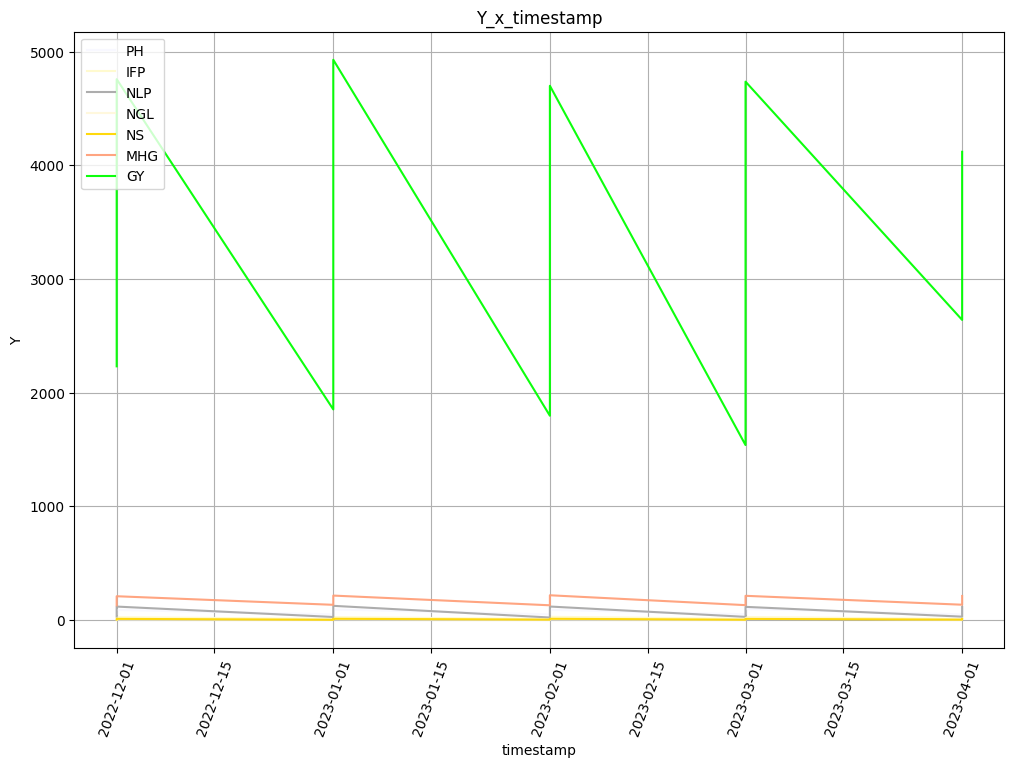

In [23]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    {'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    {'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    {'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    {'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    {'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    {'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



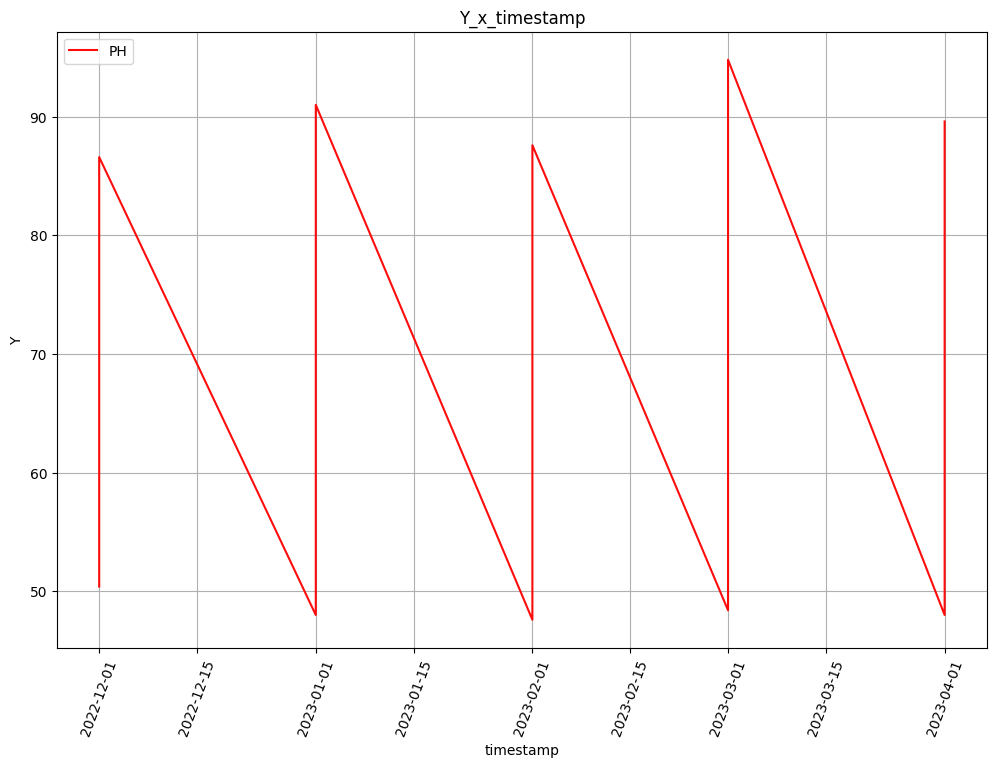

In [24]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



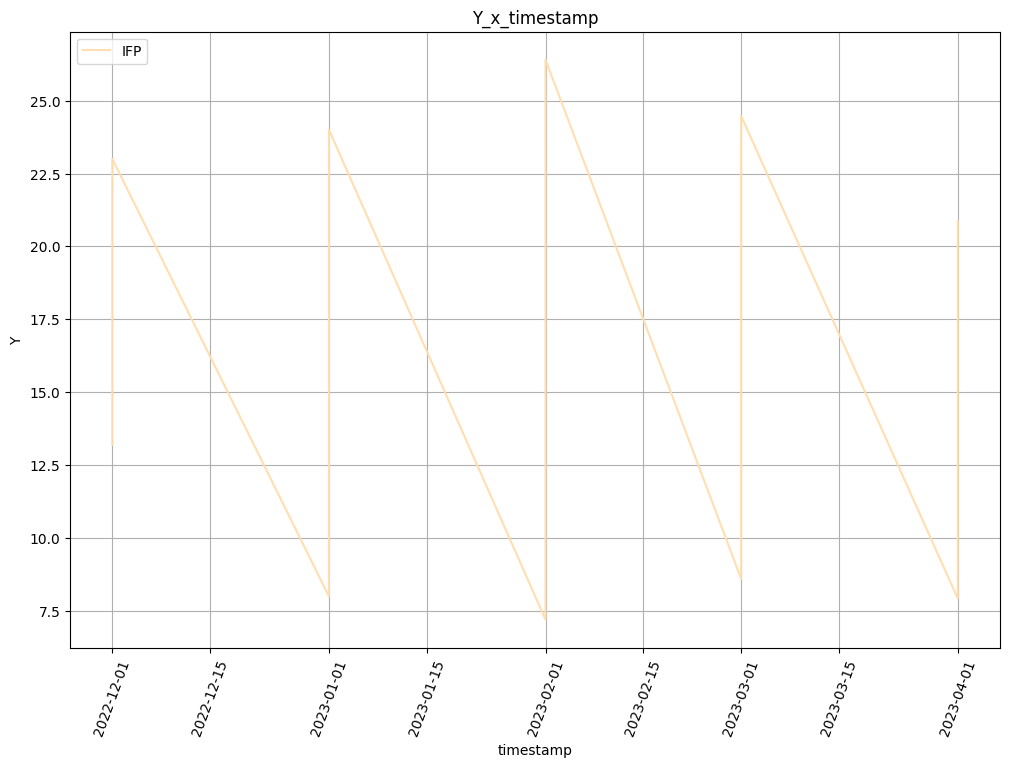

In [25]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    {'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [5]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'Cultivar', 'PH', 'IFP', 'NLP',
       'NGP', 'NGL', 'NS', 'MHG', 'GY'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



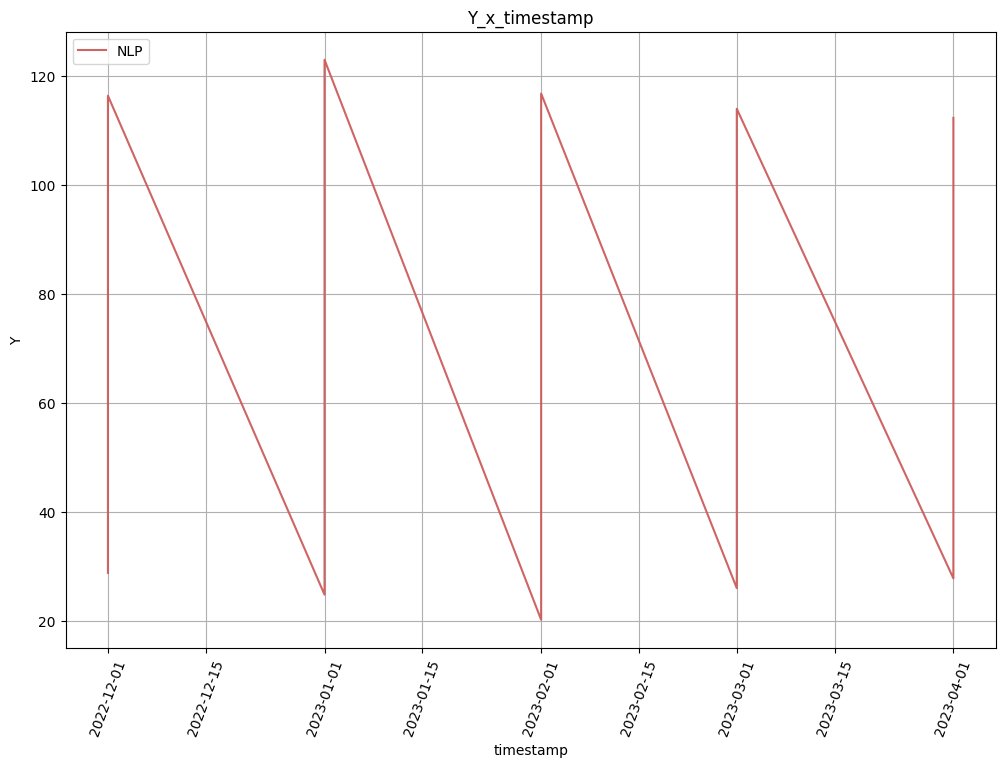

In [26]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    {'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

****

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



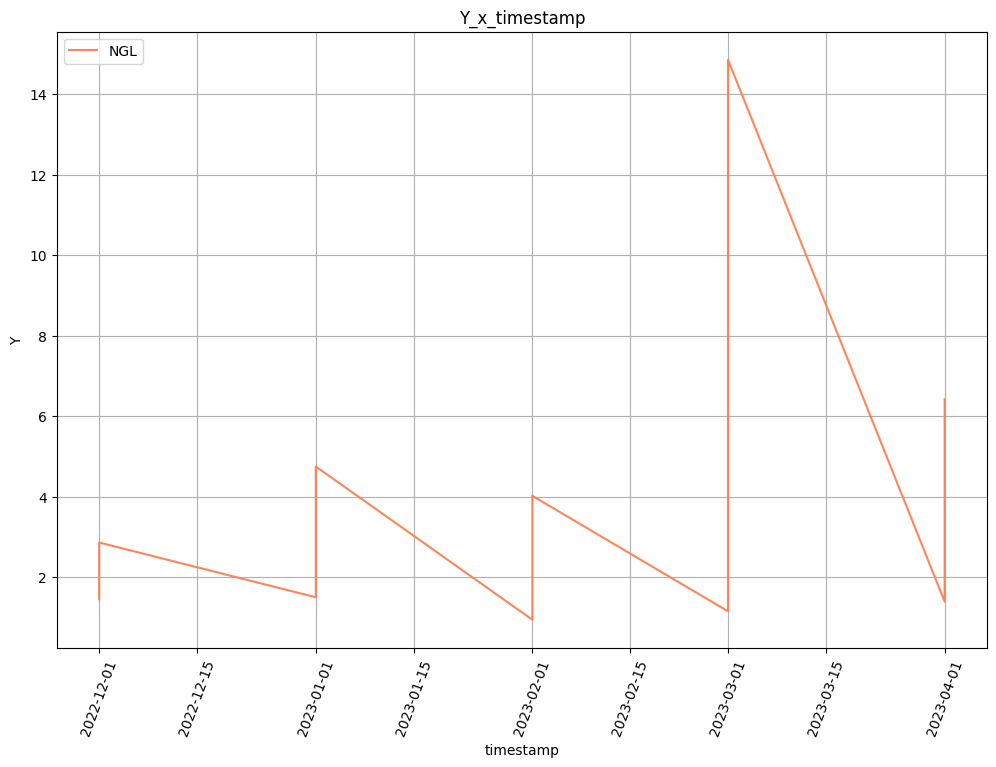

In [27]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    {'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



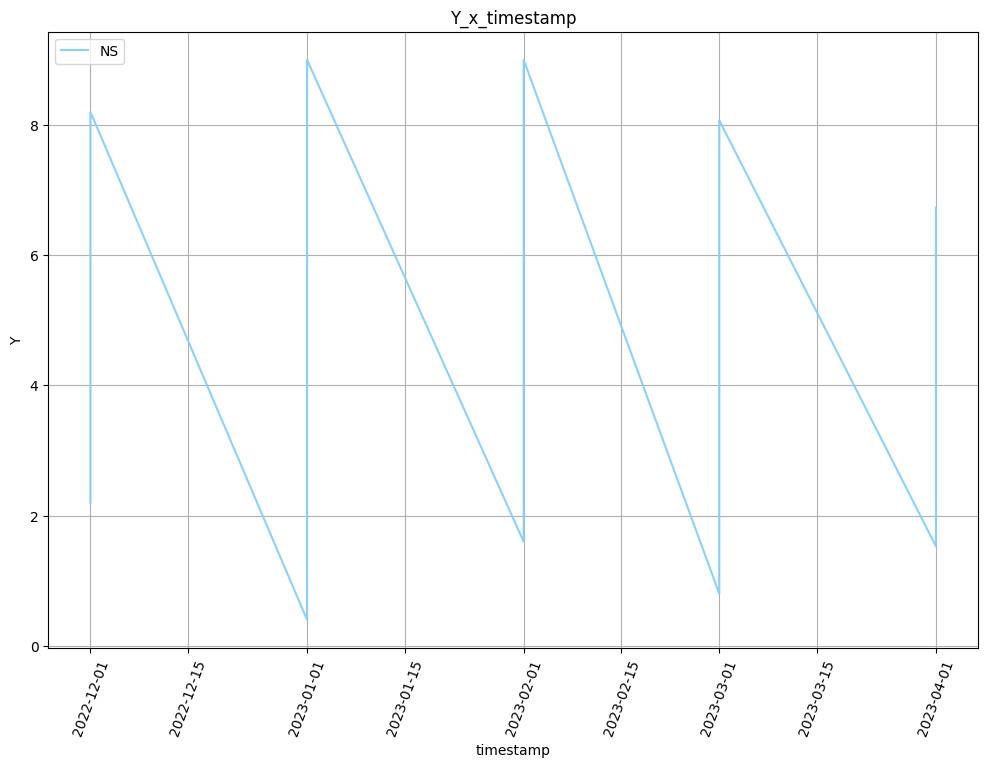

In [28]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    {'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



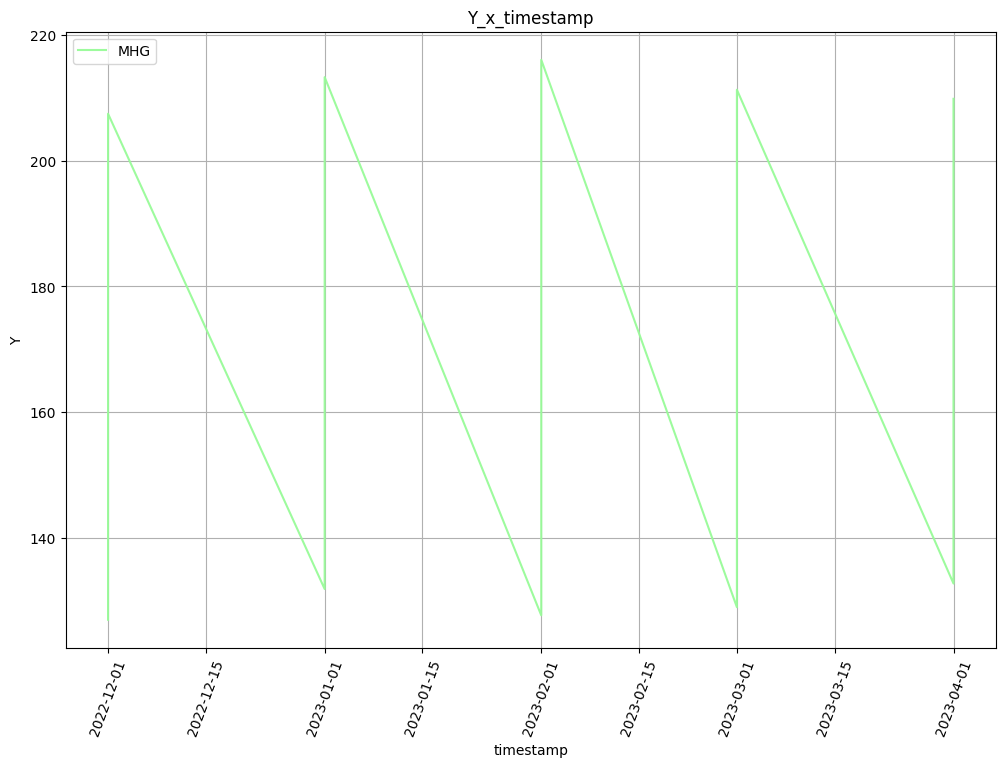

In [30]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    {'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    #{'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



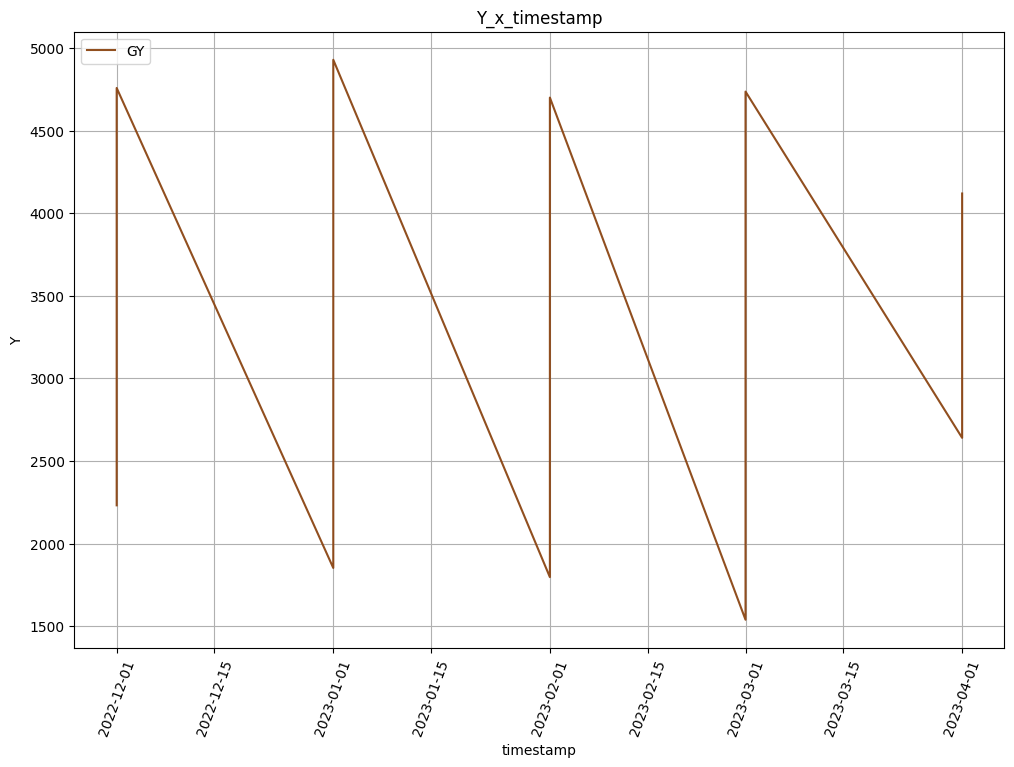

In [31]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    #{'x': dataset['timestamp'], 'y': dataset['PH'], 'lab': 'PH'},
    #{'x': dataset['timestamp'], 'y': dataset['IFP'], 'lab': 'IFP'},
    #{'x': dataset['timestamp'], 'y': dataset['NLP'], 'lab': 'NLP'},
    #{'x': dataset['timestamp'], 'y': dataset['NGL'], 'lab': 'NGL'},
    #{'x': dataset['timestamp'], 'y': dataset['NS'], 'lab': 'NS'},
    #{'x': dataset['timestamp'], 'y': dataset['MHG'], 'lab': 'MHG'},
    {'x': dataset['timestamp'], 'y': dataset['GY'], 'lab': 'GY'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [32]:
len(dataset)

320

# **Statiscal distribution skewness and kurtosis - Background**

### scipy stats.skew()
- scipy.stats.skew(array, axis=0, bias=True) function calculates the skewness of the data set.
    - skewness = 0 : normally distributed.
    - skewness > 0 : more weight in the left tail of the distribution.
    - skewness < 0 : more weight in the right tail of the distribution.

Its basic formula:

`skewness = (3 *(Mean - Median))/(Standard deviation)`

Parameters :
- array : Input array or object having the elements.
- axis : Axis along which the skewness value is to be measured. By default axis = 0.
- bias : Bool; calculations are corrected for statistical bias, if set to False.
- Returns : Skewness value of the data set, along the axis.

https://www.geeksforgeeks.org/scipy-stats-skew-python/

Scipy uses a more general and complex formula, shown in its documentation:
https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.stats.skew.html

### scipy stats.kurtosis()
- scipy.stats.kurtosis(array, axis=0, fisher=True, bias=True) function calculates the kurtosis (Fisher or Pearson) of a data set.
- It is the the fourth central moment divided by the square of the variance.
- It is a measure of the “tailedness” i.e. descriptor of shape of probability distribution of a real-valued random variable.
- In simple terms, one can say it is a measure of how heavy tail is compared to a normal distribution.

Its formula:

`Kurtosis(X) = E[((X - mu)/sigma)^4]`

Parameters :
- array : Input array or object having the elements.
- axis : Axis along which the kurtosis value is to be measured. By default axis = 0.
- fisher : Bool; Fisher’s definition is used (normal 0.0) if True; else Pearson’s definition is used (normal 3.0) if set to False.
- bias : Bool; calculations are corrected for statistical bias, if set to False.
- Returns : Kurtosis value of the normal distribution for the data set.

https://www.geeksforgeeks.org/scipy-stats-kurtosis-function-python/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html